In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

In [3]:
df = pd.read_excel("data1.xlsx")

In [4]:
df.head()

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701


### 35429 data points with 4 different features

In [5]:
df.shape

(35429, 4)

### time_stamp typed correctly

In [6]:
df.dtypes

TIME_STAMP     datetime64[ns]
SERVER_NAME            object
DOWNLOAD              float64
UPLOAD                float64
dtype: object

### Missing & Duplicate Values

In [7]:
df["SERVER_NAME"].unique()

array(['10.0.901.xx Server 1'], dtype=object)

In [8]:
df.isnull().sum()

TIME_STAMP     0
SERVER_NAME    0
DOWNLOAD       2
UPLOAD         2
dtype: int64

### Missing Values in rows

In [9]:
df[df.isnull().any(axis = 1)]

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
15,2024-03-05 17:10:00,10.0.901.xx Server 1,NaN,581.977
45,2024-03-05 14:35:00,10.0.901.xx Server 1,17139.885,NaN
151,2024-03-05 05:40:00,10.0.901.xx Server 1,NaN,64.172
218,2024-03-05 00:00:00,10.0.901.xx Server 1,35069.264,NaN


### No duplicates

In [10]:
df.duplicated().sum()

0

### General view of data with detailed quantiles

In [11]:
df.describe([0, 0.05, 0.50, 0.95, 0.99]).T

,count,mean,min,0%,5%,50%,95%,99%,max,std
TIME_STAMP,35429,2024-01-03 13:59:16.925117696,2023-11-02 10:10:00,2023-11-02 10:10:00,2023-11-08 15:17:00,2024-01-03 13:55:00,2024-02-28 12:58:00,2024-03-04 12:33:36,2024-03-05 18:25:00,NaN
DOWNLOAD,35427.0,19052.25109,2335.885,2335.885,3022.5541,18816.92,35913.1736,38568.81694,43930.614,10213.032412
UPLOAD,35427.0,482.140941,57.749,57.749,75.584,475.543,935.2447,995.06832,1670.995,267.930799


In [12]:
df = df.sort_values(by='TIME_STAMP')

In [13]:
df.head()

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
35428,2023-11-02 10:10:00,10.0.901.xx Server 1,14611.335,357.395
35427,2023-11-02 10:15:00,10.0.901.xx Server 1,14336.298,355.811
35426,2023-11-02 10:20:00,10.0.901.xx Server 1,14381.373,357.816
35425,2023-11-02 10:25:00,10.0.901.xx Server 1,14461.797,358.717
35424,2023-11-02 10:30:00,10.0.901.xx Server 1,14604.990,364.365


In [14]:
df.tail()

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700


In [15]:
num_cols = df.select_dtypes(include='float64').columns

In [16]:
num_cols

Index(['DOWNLOAD', 'UPLOAD'], dtype='object')

In [17]:
df = df.set_index("TIME_STAMP")

### Overall Line Plot for Download Feature

<Axes: xlabel='TIME_STAMP'>

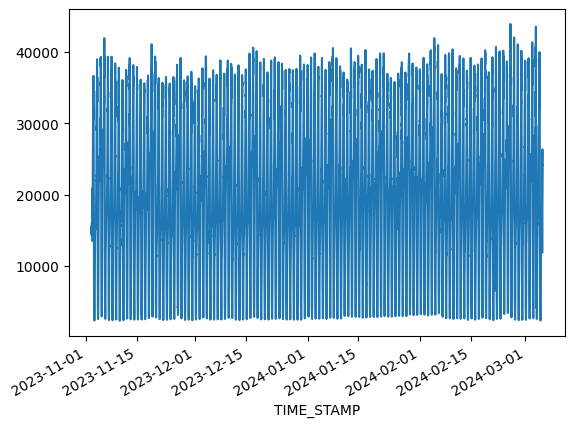

In [18]:
df["DOWNLOAD"].plot()

### Overall Line Plot for Download Feature

<Axes: xlabel='TIME_STAMP'>

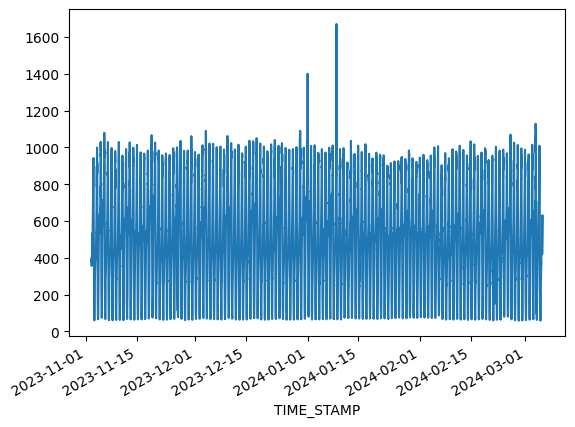

In [19]:
df["UPLOAD"].plot()

# Daily Transactions

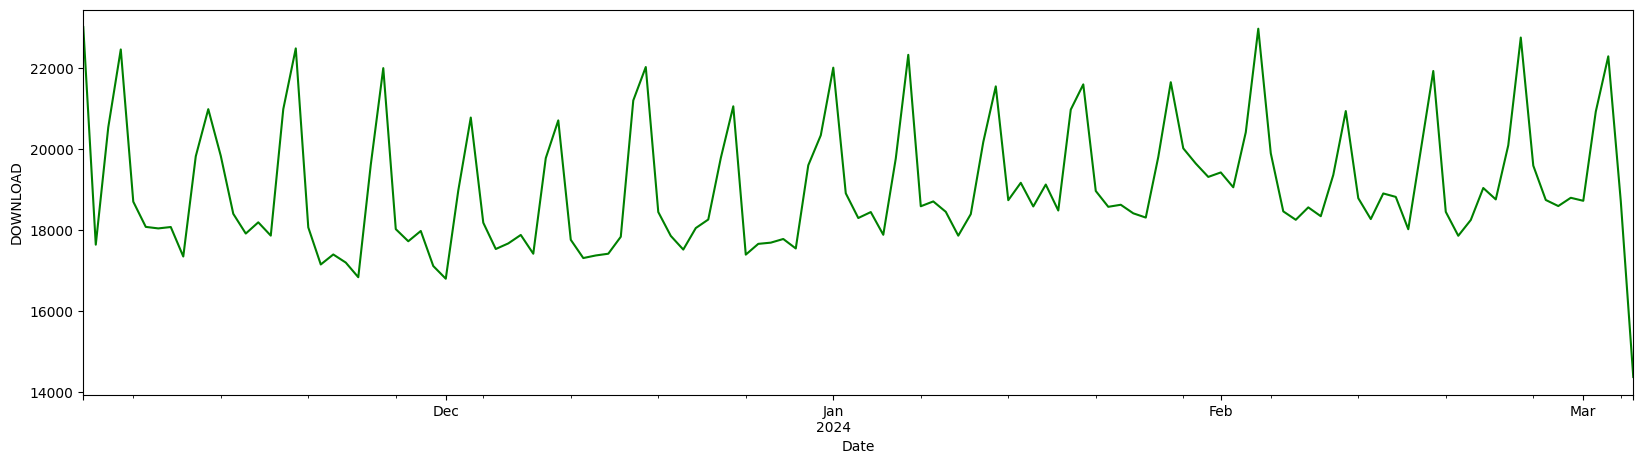

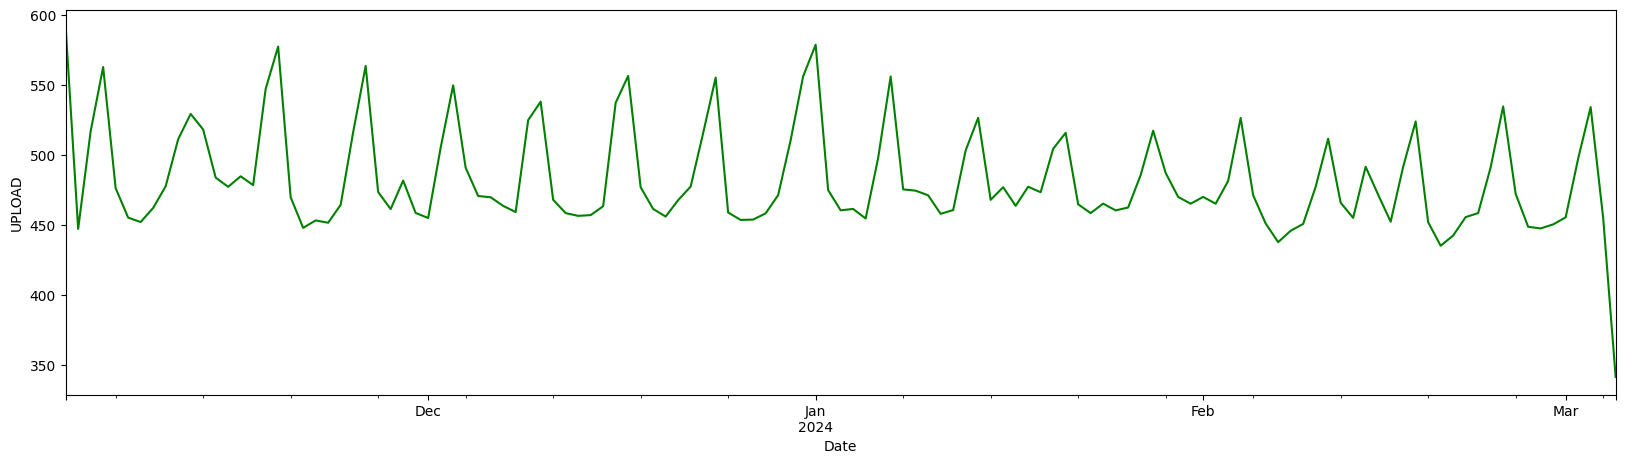

In [20]:
for col in num_cols:
    df[col].resample('D').mean().plot(color = "green", figsize=(20, 5))
    
    plt.xlabel("Date")
    plt.ylabel(col)
    
    plt.show()

# Weekly Transactions

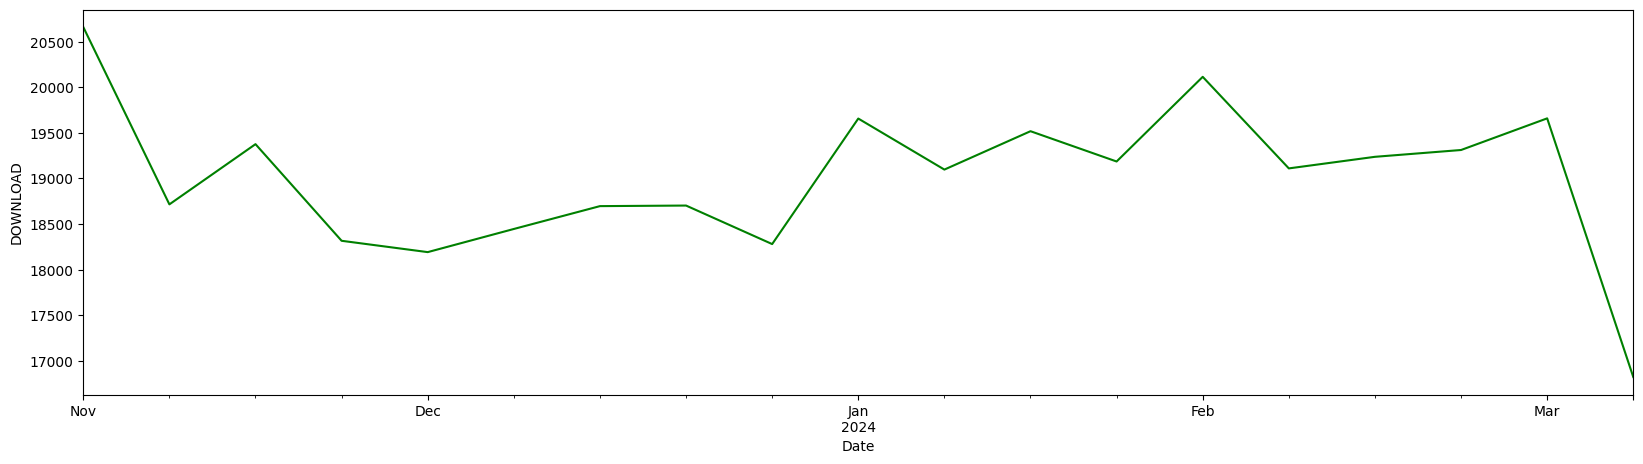

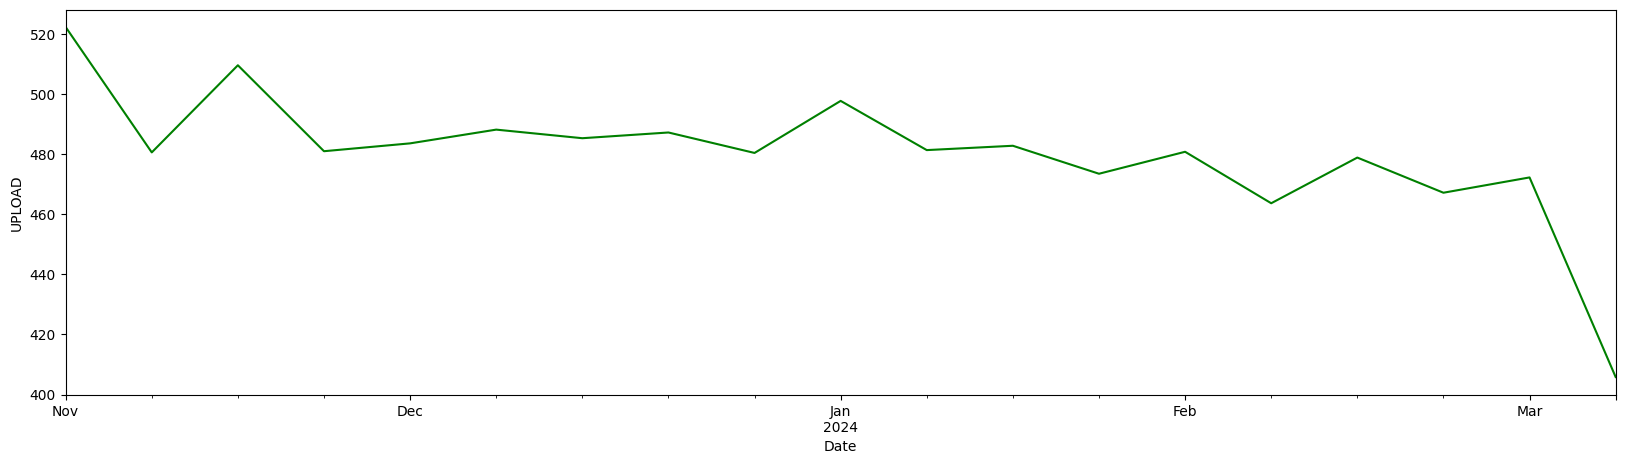

In [21]:
for col in num_cols:
    df[col].resample('W').mean().plot(color = "green", figsize=(20, 5))
    
    plt.xlabel("Date")
    plt.ylabel(col)
    
    plt.show()

In [22]:
df = df.reset_index()

In [23]:
df['WEEK'] = df['TIME_STAMP'].dt.isocalendar().week

In [24]:
df['YEAR'] = df['TIME_STAMP'].dt.year

# Linear Interp

In [25]:
df["DOWNLOAD"].interpolate(method = "linear", inplace = True)

In [26]:
df["UPLOAD"].interpolate(method = "linear", inplace = True)

In [27]:
df.isnull().sum()

TIME_STAMP     0
SERVER_NAME    0
DOWNLOAD       0
UPLOAD         0
WEEK           0
YEAR           0
dtype: int64

# Decomposition -- Original - (Trend + Seasonal) = Residual

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
df = df.set_index("TIME_STAMP")

In [30]:
decomposition_download = seasonal_decompose(df['DOWNLOAD'], model='multiplicative', period=288)

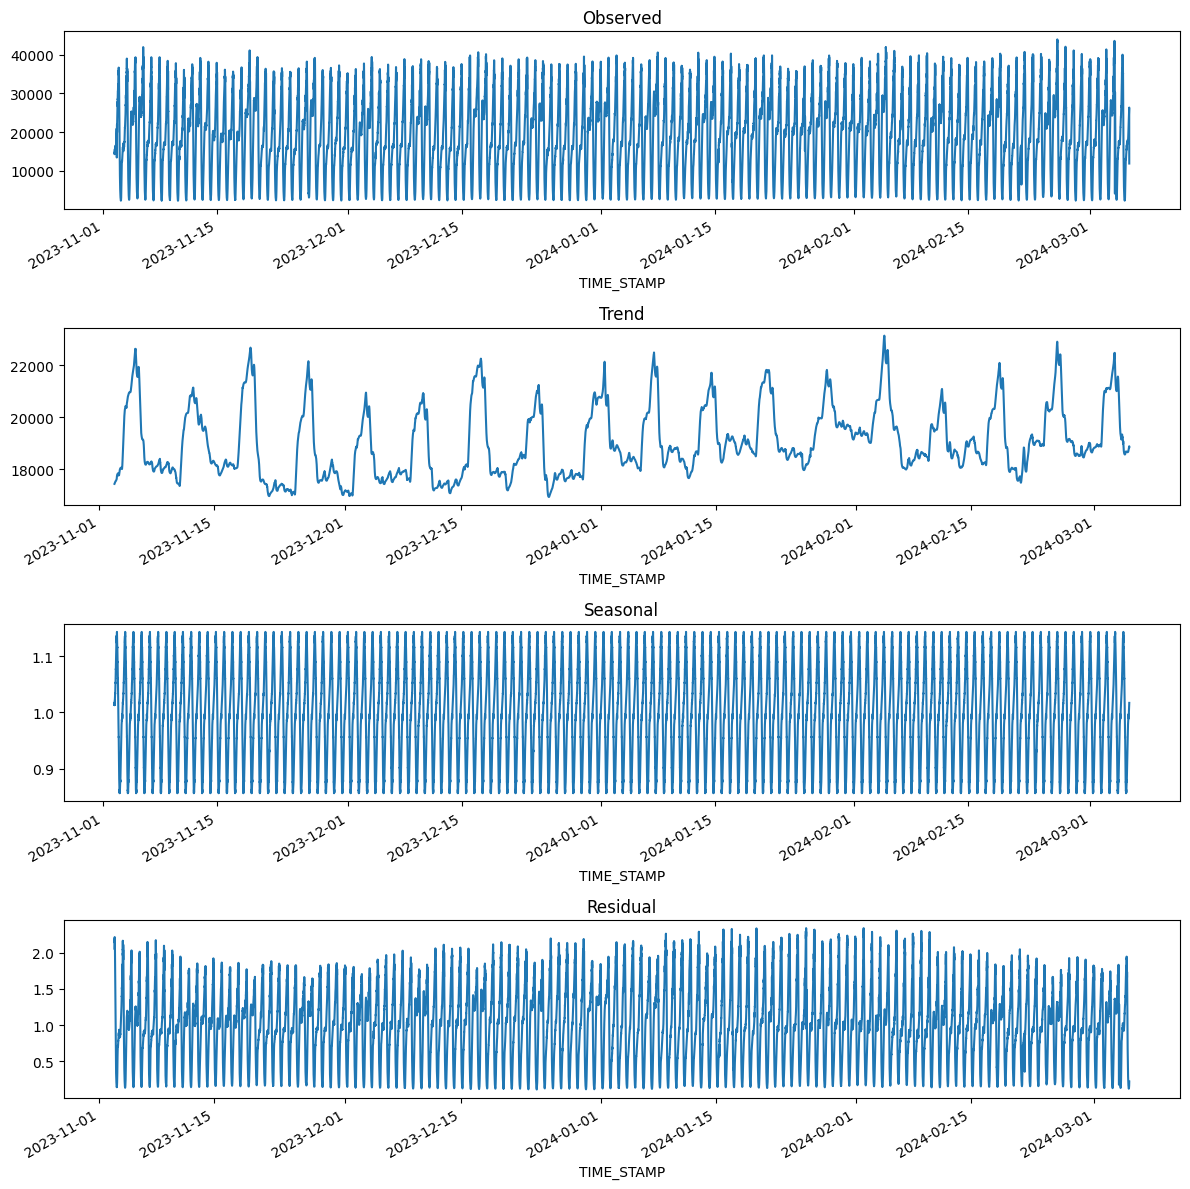

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))
decomposition_download.observed.plot(ax=ax1)

ax1.set_title('Observed')
decomposition_download.trend.plot(ax=ax2)

ax2.set_title('Trend')
decomposition_download.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition_download.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# Download Transactions | Weekdays vs Holidays

In [32]:
df['is_holiday'] = ((df.index.weekday >= 5) | ((df.index.month == 1) & (df.index.day == 1))).astype(int)

In [33]:
df[df["is_holiday"] == 1].head()

,SERVER_NAME,DOWNLOAD,UPLOAD,WEEK,YEAR,is_holiday
TIME_STAMP,,,,,,
2023-11-04 00:00:00,10.0.901.xx Server 1,35726.693,914.139,44,2023,1
2023-11-04 00:05:00,10.0.901.xx Server 1,35488.857,895.982,44,2023,1
2023-11-04 00:15:00,10.0.901.xx Server 1,32974.528,830.775,44,2023,1
2023-11-04 00:20:00,10.0.901.xx Server 1,32476.194,817.213,44,2023,1
2023-11-04 00:25:00,10.0.901.xx Server 1,31651.660,793.607,44,2023,1


In [34]:
weekdays = df[df['is_holiday'] == False]
holidays = df[df['is_holiday'] == True]

In [35]:
weekdays["UPLOAD"].mean()

463.9082883463935

In [36]:
weekdays[weekdays["is_holiday"] == ]

SyntaxError: invalid syntax (461807021.py, line 1)

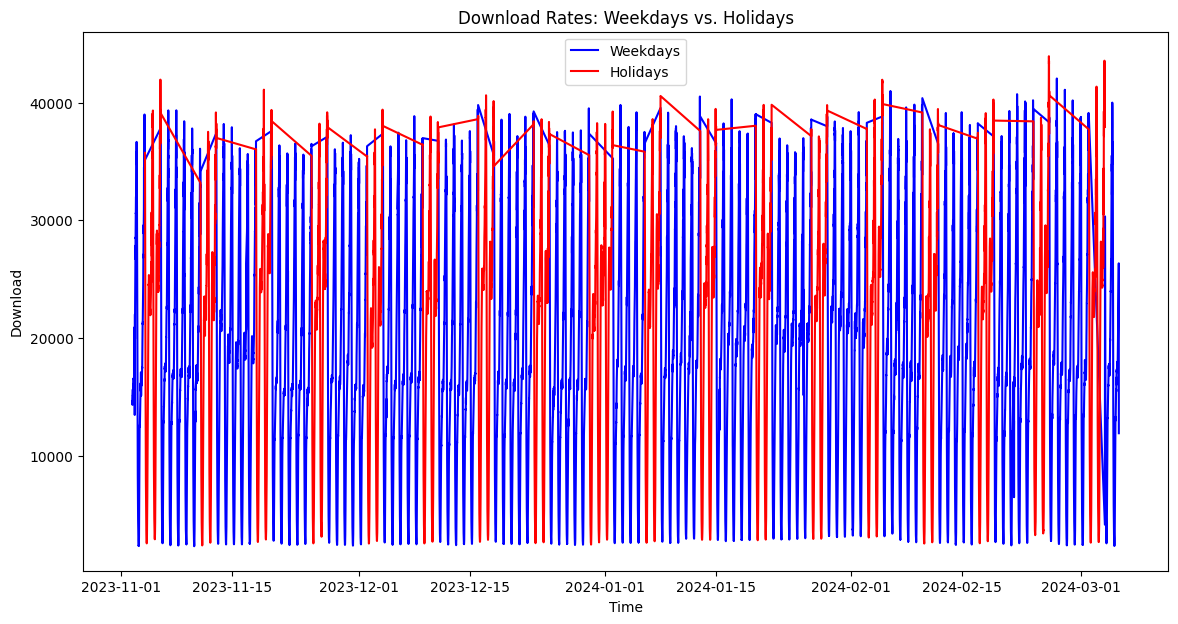

In [37]:
plt.figure(figsize=(14, 7))

plt.plot(weekdays.index, weekdays['DOWNLOAD'], label='Weekdays', color='blue')

plt.plot(holidays.index, holidays['DOWNLOAD'], label='Holidays', color='red')


plt.title('Download Rates: Weekdays vs. Holidays')
plt.xlabel('Time')
plt.ylabel('Download')
plt.legend()

plt.show()

## Upload Transactions | Weekdays vs Holidays

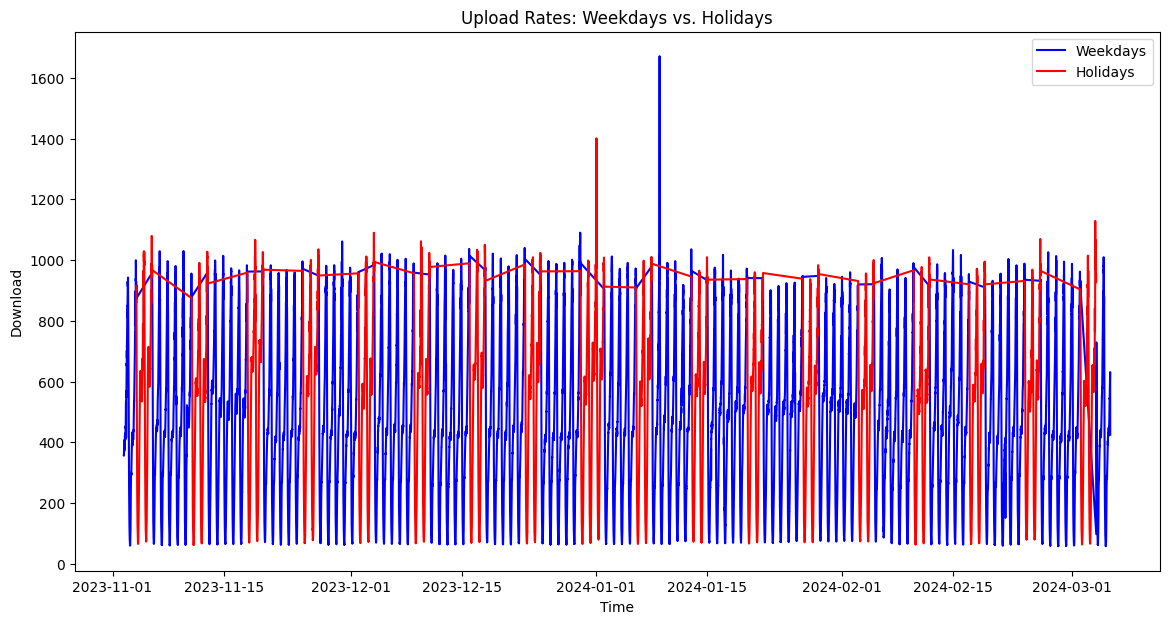

In [38]:
plt.figure(figsize=(14, 7))

plt.plot(weekdays.index, weekdays['UPLOAD'], label='Weekdays', color='blue')

plt.plot(holidays.index, holidays['UPLOAD'], label='Holidays', color='red')


plt.title('Upload Rates: Weekdays vs. Holidays')
plt.xlabel('Time')
plt.ylabel('Download')
plt.legend()

plt.show()

In [39]:
df.head()

,SERVER_NAME,DOWNLOAD,UPLOAD,WEEK,YEAR,is_holiday
TIME_STAMP,,,,,,
2023-11-02 10:10:00,10.0.901.xx Server 1,14611.335,357.395,44,2023,0
2023-11-02 10:15:00,10.0.901.xx Server 1,14336.298,355.811,44,2023,0
2023-11-02 10:20:00,10.0.901.xx Server 1,14381.373,357.816,44,2023,0
2023-11-02 10:25:00,10.0.901.xx Server 1,14461.797,358.717,44,2023,0
2023-11-02 10:30:00,10.0.901.xx Server 1,14604.990,364.365,44,2023,0


### Traffic Amounts in different day parts

In [40]:
def classify_time_of_day(hour):
    if hour < 11:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

In [41]:
df['Time_of_Day'] = df.index.hour.map(classify_time_of_day)

In [42]:
monthly_df = df.groupby([df.index.to_period('M'), 'Time_of_Day'])['DOWNLOAD'].mean().unstack()

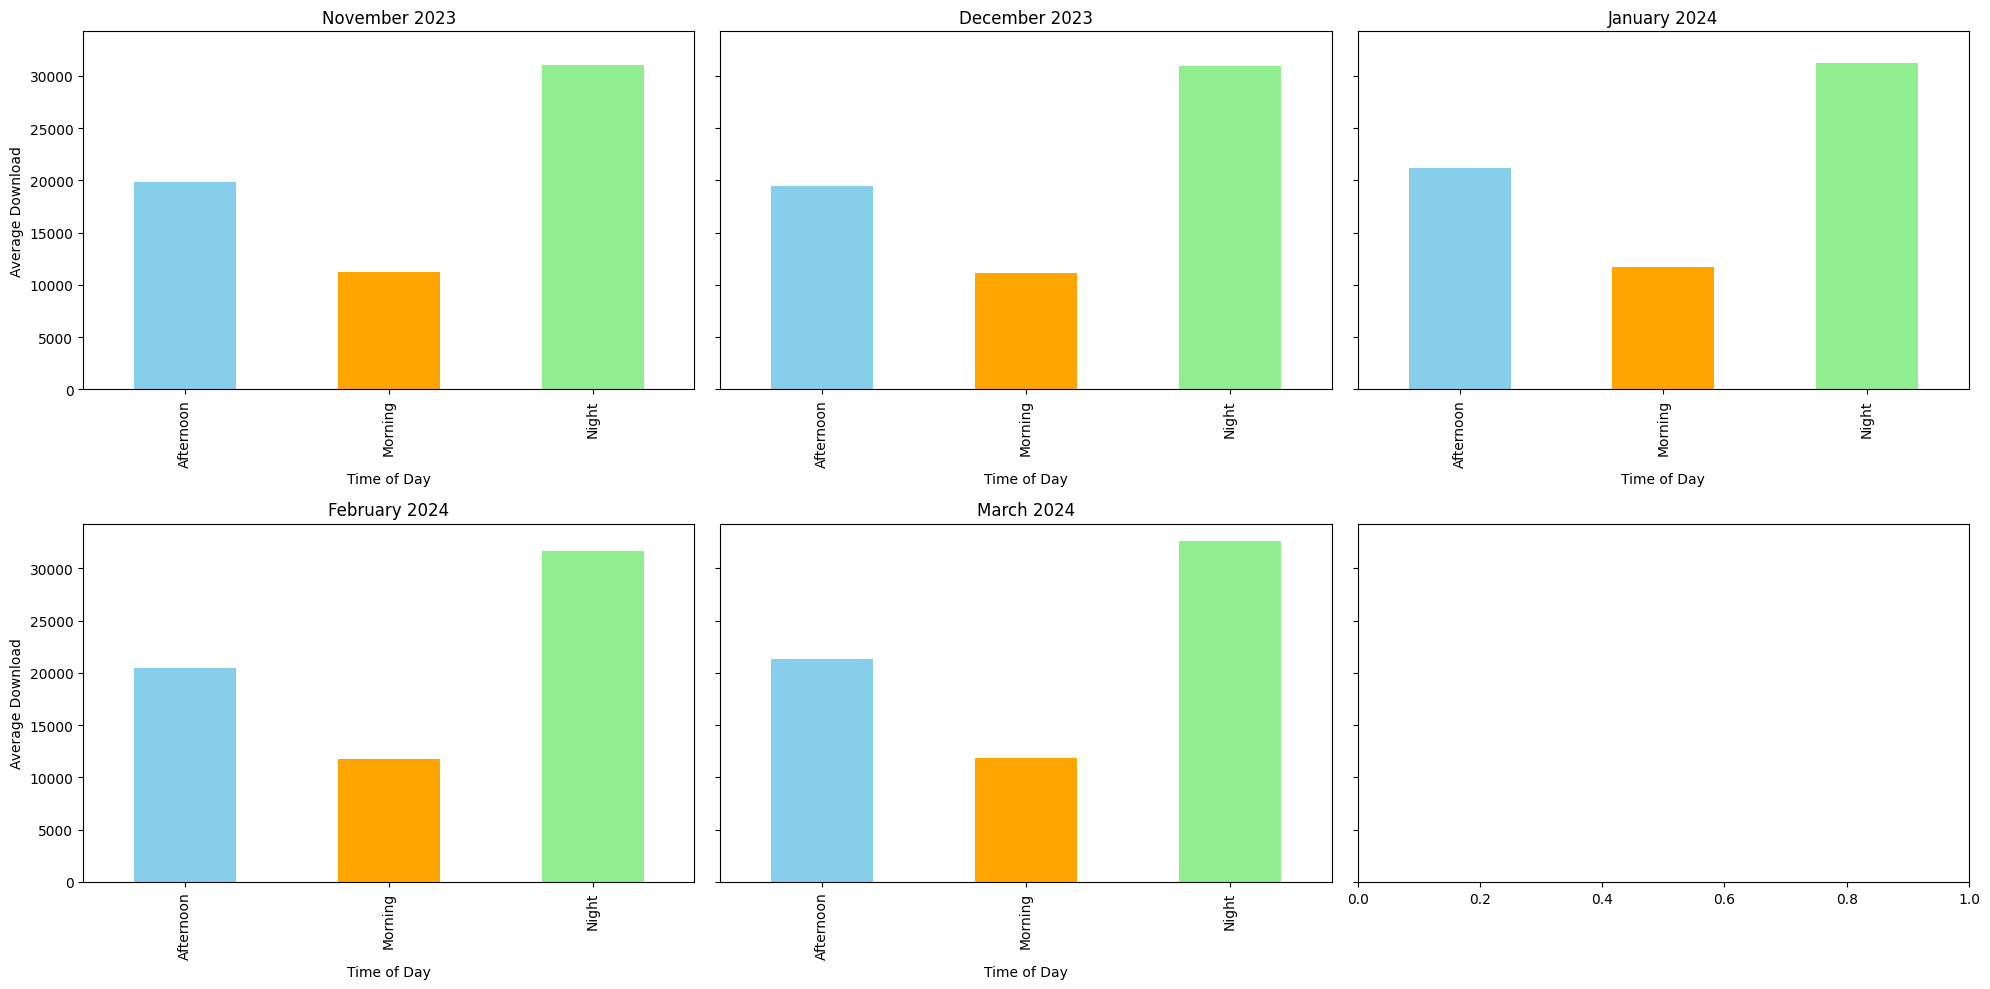

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(20, 5 * 2), sharey=True)
axes = axes.flatten()

for i, (month, month_data) in enumerate(monthly_df.iterrows()):
    month_data.plot(kind='bar', ax=axes[i], color=['skyblue', 'orange', 'lightgreen'])
    axes[i].set_title(month.strftime('%B %Y'))
    axes[i].set_xlabel('Time of Day')
    axes[i].set_ylabel('Average Download')
    
plt.tight_layout()
plt.show()

## Upload

In [44]:
monthly_df1 = df.groupby([df.index.to_period('M'), 'Time_of_Day'])['UPLOAD'].mean().unstack()

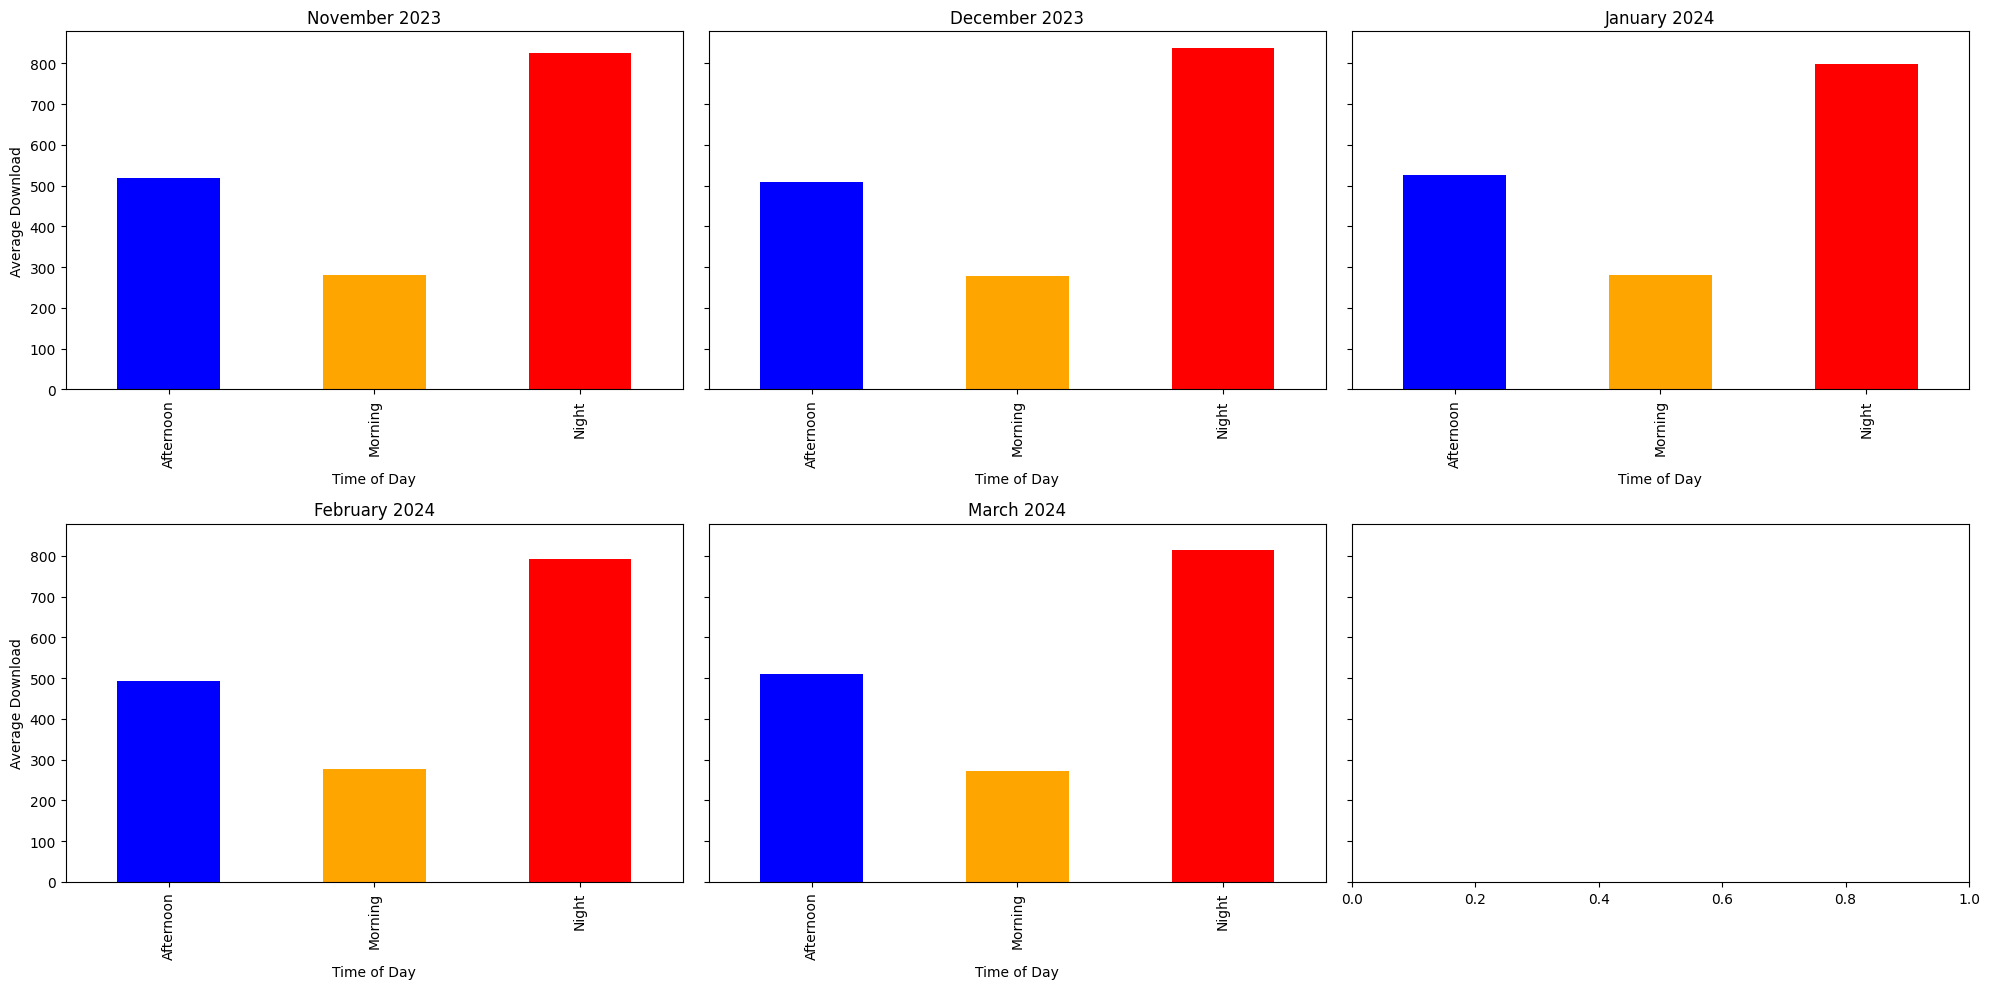

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(20, 5 * 2), sharey=True)
axes = axes.flatten()

for i, (month, month_data) in enumerate(monthly_df1.iterrows()):
    month_data.plot(kind='bar', ax=axes[i], color=['blue', 'orange', 'red'])
    axes[i].set_title(month.strftime('%B %Y'))
    axes[i].set_xlabel('Time of Day')
    axes[i].set_ylabel('Average Download')
    
plt.tight_layout()
plt.show()

In [46]:
df = df.reset_index()

In [47]:
df['MONTH'] = df['TIME_STAMP'].dt.month

## Modeling

In [48]:
df.dtypes

TIME_STAMP     datetime64[ns]
SERVER_NAME            object
DOWNLOAD              float64
UPLOAD                float64
WEEK                   UInt32
YEAR                    int32
is_holiday              int32
Time_of_Day            object
MONTH                   int32
dtype: object

In [49]:
df = df.drop(columns=["SERVER_NAME"])

In [50]:
df.head()

,TIME_STAMP,DOWNLOAD,UPLOAD,WEEK,YEAR,is_holiday,Time_of_Day,MONTH
0,2023-11-02 10:10:00,14611.335,357.395,44,2023,0,Morning,11
1,2023-11-02 10:15:00,14336.298,355.811,44,2023,0,Morning,11
2,2023-11-02 10:20:00,14381.373,357.816,44,2023,0,Morning,11
3,2023-11-02 10:25:00,14461.797,358.717,44,2023,0,Morning,11
4,2023-11-02 10:30:00,14604.990,364.365,44,2023,0,Morning,11


In [68]:
df.to_csv("xyz.csv")

## Isolation Forest

In [51]:
from sklearn.preprocessing import OneHotEncoder

# Select relevant features
features = df[['DOWNLOAD', 'UPLOAD', 'WEEK', 'YEAR', 'is_holiday', 'Time_of_Day', 'MONTH']]

# One-hot encode the 'Time_of_Day' feature
encoder = OneHotEncoder(sparse=False)
time_of_day_encoded = encoder.fit_transform(features[['Time_of_Day']])
time_of_day_encoded_df = pd.DataFrame(time_of_day_encoded, columns=encoder.get_feature_names_out(['Time_of_Day']))

# Drop the original 'Time_of_Day' column and concatenate the encoded columns
features = features.drop(columns=['Time_of_Day']).reset_index(drop=True)
features = pd.concat([features, time_of_day_encoded_df], axis=1)


C:\Users\Erkut\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
features.drop("Time_of_Day_Afternoon", axis = 1, inplace = True)

In [54]:
features.head()

,DOWNLOAD,UPLOAD,WEEK,YEAR,is_holiday,MONTH,Time_of_Day_Morning,Time_of_Day_Night
0,14611.335,357.395,44,2023,0,11,1.0,0.0
1,14336.298,355.811,44,2023,0,11,1.0,0.0
2,14381.373,357.816,44,2023,0,11,1.0,0.0
3,14461.797,358.717,44,2023,0,11,1.0,0.0
4,14604.990,364.365,44,2023,0,11,1.0,0.0


In [55]:
from sklearn.ensemble import IsolationForest

In [56]:
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(features)

C:\Users\Erkut\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=42)

In [79]:
features['anomaly'] = iso_forest.predict(features)

### New record

In [62]:
new_data_point = [[11927.017, 424.7, 10, 2023, 0, 3, 0, 1]]

In [63]:
new_data_point_df = pd.DataFrame(new_data_point, columns=['DOWNLOAD', 'UPLOAD', 'WEEK', 'YEAR', 'is_holiday', 'MONTH', 'Time_of_Day_Morning', "Time_of_Day_Night"])

In [64]:
new_data_point_df

,DOWNLOAD,UPLOAD,WEEK,YEAR,is_holiday,MONTH,Time_of_Day_Morning,Time_of_Day_Night
0,11927.017,424.7,10,2023,0,3,0,1


In [65]:
new_data_point_df = pd.concat([new_data_point_df, features], axis=0)

In [67]:
new_data_point_df

,DOWNLOAD,UPLOAD,WEEK,YEAR,is_holiday,MONTH,Time_of_Day_Morning,Time_of_Day_Night
0,11927.017,424.700,10,2023,0,3,0.0,1.0
0,14611.335,357.395,44,2023,0,11,1.0,0.0
1,14336.298,355.811,44,2023,0,11,1.0,0.0
2,14381.373,357.816,44,2023,0,11,1.0,0.0
3,14461.797,358.717,44,2023,0,11,1.0,0.0
...,...,...,...,...,...,...,...,...
35424,25814.357,620.701,10,2024,0,3,0.0,1.0
35425,26068.494,623.673,10,2024,0,3,0.0,1.0
35426,26349.663,631.144,10,2024,0,3,0.0,1.0
35427,19703.467,525.575,10,2024,0,3,0.0,1.0


In [66]:
prediction = iso_forest.predict(new_data_point_df)

In [69]:
prediction[0]

1

In [71]:
df['anomaly'] = iso_forest.predict(features)

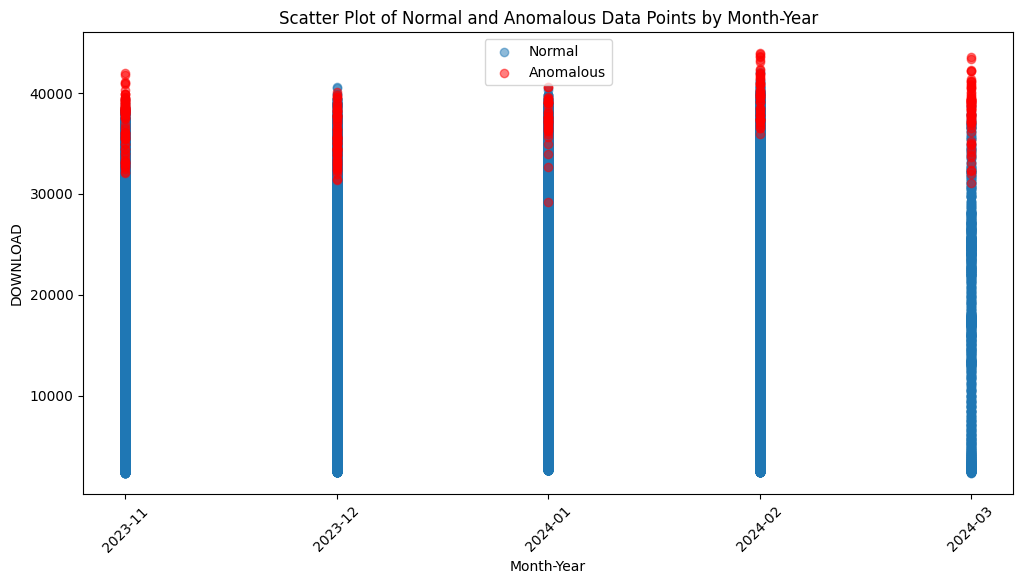

In [72]:
# Extract the month part for plotting
df['MONTH_YEAR'] = df['TIME_STAMP'].dt.to_period('M')

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot for normal data points
plt.scatter(df[df['anomaly'] == 1]['MONTH_YEAR'].astype(str), df[df['anomaly'] == 1]['DOWNLOAD'], label='Normal', alpha=0.5)

# Scatter plot for anomalous data points
plt.scatter(df[df['anomaly'] == -1]['MONTH_YEAR'].astype(str), df[df['anomaly'] == -1]['DOWNLOAD'], color='r', label='Anomalous', alpha=0.5)

# Adding labels and title
plt.xlabel('Month-Year')
plt.ylabel('DOWNLOAD')
plt.title('Scatter Plot of Normal and Anomalous Data Points by Month-Year')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

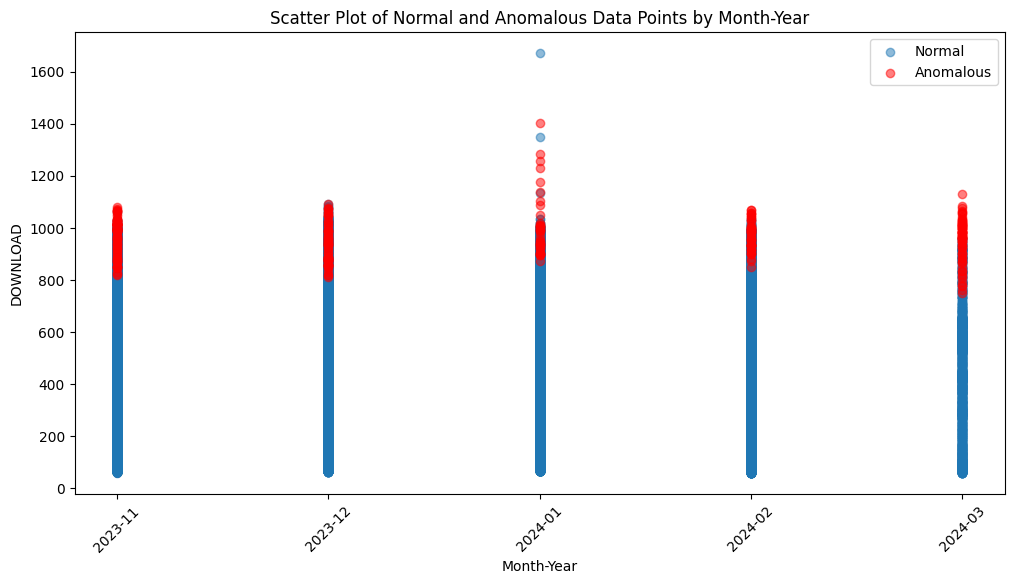

In [73]:
# Extract the month part for plotting
df['MONTH_YEAR'] = df['TIME_STAMP'].dt.to_period('M')

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot for normal data points
plt.scatter(df[df['anomaly'] == 1]['MONTH_YEAR'].astype(str), df[df['anomaly'] == 1]['UPLOAD'], label='Normal', alpha=0.5)

# Scatter plot for anomalous data points
plt.scatter(df[df['anomaly'] == -1]['MONTH_YEAR'].astype(str), df[df['anomaly'] == -1]['UPLOAD'], color='r', label='Anomalous', alpha=0.5)

# Adding labels and title
plt.xlabel('Month-Year')
plt.ylabel('DOWNLOAD')
plt.title('Scatter Plot of Normal and Anomalous Data Points by Month-Year')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### New record is weekday and night

In [53]:
df[(df["is_holiday"] == 0) & (df["Time_of_Day"] == "Night")].shape

(6269, 8)

In [54]:
df_x = df[(df["is_holiday"] == 0) & (df["Time_of_Day"] == "Night")]

In [55]:
df_x = df_x.set_index("TIME_STAMP")

<Axes: xlabel='TIME_STAMP'>

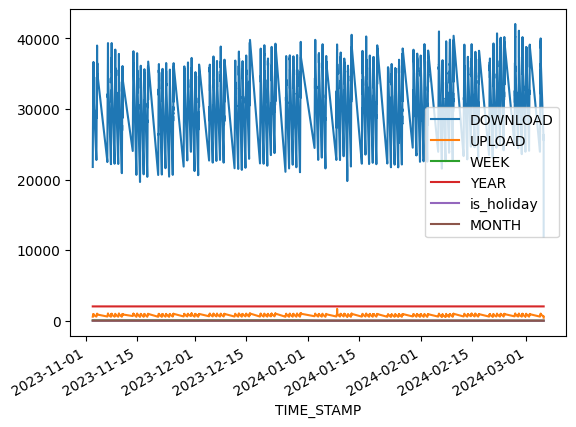

In [56]:
df_x.plot()

In [63]:
p = df[(df["is_holiday"] == 0) & (df["Time_of_Day"] == "Night")]

In [64]:
p["DOWNLOAD"].mean()

31011.83994544584

In [66]:
p["DOWNLOAD"].std()

4527.908682955963

In [65]:
p["UPLOAD"].mean()

805.4200642845748

In [67]:
p["UPLOAD"].std()

124.03571346954483

# Sin Cosin Transformation for WEEK

In [74]:
df.head()

,TIME_STAMP,DOWNLOAD,UPLOAD,WEEK,YEAR,is_holiday,Time_of_Day,MONTH,anomaly,MONTH_YEAR
0,2023-11-02 10:10:00,14611.335,357.395,44,2023,0,Morning,11,1,2023-11
1,2023-11-02 10:15:00,14336.298,355.811,44,2023,0,Morning,11,1,2023-11
2,2023-11-02 10:20:00,14381.373,357.816,44,2023,0,Morning,11,1,2023-11
3,2023-11-02 10:25:00,14461.797,358.717,44,2023,0,Morning,11,1,2023-11
4,2023-11-02 10:30:00,14604.990,364.365,44,2023,0,Morning,11,1,2023-11


In [75]:
df.drop("anomaly", axis = 1, inplace = True)

In [76]:
df['WEEK_sin'] = np.sin(2 * np.pi * df['WEEK'] / 52)
df['WEEK_cos'] = np.cos(2 * np.pi * df['WEEK'] / 52)

In [77]:
df = df.drop(columns = ["WEEK"])

In [78]:
df.dtypes

TIME_STAMP     datetime64[ns]
DOWNLOAD              float64
UPLOAD                float64
YEAR                    int32
is_holiday              int32
Time_of_Day            object
MONTH                   int32
MONTH_YEAR          period[M]
WEEK_sin              Float64
WEEK_cos              Float64
dtype: object

In [79]:
df['MONTH_sin'] = np.sin(2 * np.pi * df['MONTH'] / 12)
df['MONTH_cos'] = np.cos(2 * np.pi * df['MONTH'] / 12)

In [80]:
df = df.drop(columns = ["MONTH"])

In [81]:
df.dtypes

TIME_STAMP     datetime64[ns]
DOWNLOAD              float64
UPLOAD                float64
YEAR                    int32
is_holiday              int32
Time_of_Day            object
MONTH_YEAR          period[M]
WEEK_sin              Float64
WEEK_cos              Float64
MONTH_sin             float64
MONTH_cos             float64
dtype: object

In [82]:
df = pd.get_dummies(df, columns=['Time_of_Day'], drop_first = True)

In [83]:
df.dtypes

TIME_STAMP             datetime64[ns]
DOWNLOAD                      float64
UPLOAD                        float64
YEAR                            int32
is_holiday                      int32
MONTH_YEAR                  period[M]
WEEK_sin                      Float64
WEEK_cos                      Float64
MONTH_sin                     float64
MONTH_cos                     float64
Time_of_Day_Morning              bool
Time_of_Day_Night                bool
dtype: object

In [84]:
df.head()

,TIME_STAMP,DOWNLOAD,UPLOAD,YEAR,is_holiday,MONTH_YEAR,WEEK_sin,WEEK_cos,MONTH_sin,MONTH_cos,Time_of_Day_Morning,Time_of_Day_Night
0,2023-11-02 10:10:00,14611.335,357.395,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
1,2023-11-02 10:15:00,14336.298,355.811,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
2,2023-11-02 10:20:00,14381.373,357.816,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
3,2023-11-02 10:25:00,14461.797,358.717,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
4,2023-11-02 10:30:00,14604.990,364.365,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False


In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
standard_features = ["DOWNLOAD", "UPLOAD"]

In [87]:
standard_scaler = StandardScaler()

In [88]:
df[standard_features] = standard_scaler.fit_transform(df[standard_features])

In [89]:
df.head()

,TIME_STAMP,DOWNLOAD,UPLOAD,YEAR,is_holiday,MONTH_YEAR,WEEK_sin,WEEK_cos,MONTH_sin,MONTH_cos,Time_of_Day_Morning,Time_of_Day_Night
0,2023-11-02 10:10:00,-0.434798,-0.465631,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
1,2023-11-02 10:15:00,-0.461728,-0.471543,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
2,2023-11-02 10:20:00,-0.457315,-0.464059,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
3,2023-11-02 10:25:00,-0.449440,-0.460697,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
4,2023-11-02 10:30:00,-0.435419,-0.439616,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False


In [90]:
df = df.set_index("TIME_STAMP")

In [92]:
df.head()

,DOWNLOAD,UPLOAD,YEAR,is_holiday,MONTH_YEAR,WEEK_sin,WEEK_cos,MONTH_sin,MONTH_cos,Time_of_Day_Morning,Time_of_Day_Night
TIME_STAMP,,,,,,,,,,,
2023-11-02 10:10:00,-0.434798,-0.465631,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
2023-11-02 10:15:00,-0.461728,-0.471543,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
2023-11-02 10:20:00,-0.457315,-0.464059,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
2023-11-02 10:25:00,-0.449440,-0.460697,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False
2023-11-02 10:30:00,-0.435419,-0.439616,2023,0,2023-11,-0.822984,0.568065,-0.5,0.866025,True,False


In [93]:
df.drop("MONTH_YEAR", axis = 1, inplace = True)

In [94]:
corr_df = df.corr()

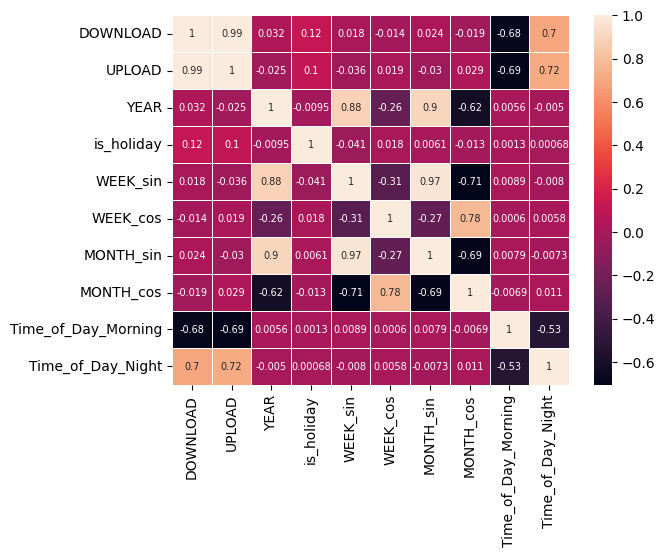

In [95]:
sns.heatmap(corr_df,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 7})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [97]:
df = df.reset_index()

In [98]:
df.head()

,index,TIME_STAMP,DOWNLOAD,UPLOAD,YEAR,is_holiday,WEEK_sin,WEEK_cos,MONTH_sin,MONTH_cos,Time_of_Day_Morning,Time_of_Day_Night
0,0,2023-11-02 10:10:00,-0.434798,-0.465631,2023,0,-0.822984,0.568065,-0.5,0.866025,True,False
1,1,2023-11-02 10:15:00,-0.461728,-0.471543,2023,0,-0.822984,0.568065,-0.5,0.866025,True,False
2,2,2023-11-02 10:20:00,-0.457315,-0.464059,2023,0,-0.822984,0.568065,-0.5,0.866025,True,False
3,3,2023-11-02 10:25:00,-0.449440,-0.460697,2023,0,-0.822984,0.568065,-0.5,0.866025,True,False
4,4,2023-11-02 10:30:00,-0.435419,-0.439616,2023,0,-0.822984,0.568065,-0.5,0.866025,True,False


In [99]:
df = df.sort_values(by='TIME_STAMP', ascending=False)

In [100]:
df.head()

,index,TIME_STAMP,DOWNLOAD,UPLOAD,YEAR,is_holiday,WEEK_sin,WEEK_cos,MONTH_sin,MONTH_cos,Time_of_Day_Morning,Time_of_Day_Night
35428,35428,2024-03-05 18:25:00,-0.697631,-0.214425,2024,0,0.935016,0.354605,1.0,6.123234e-17,False,True
35427,35427,2024-03-05 18:20:00,0.063795,0.162076,2024,0,0.935016,0.354605,1.0,6.123234e-17,False,True
35426,35426,2024-03-05 18:15:00,0.714553,0.556097,2024,0,0.935016,0.354605,1.0,6.123234e-17,False,True
35425,35425,2024-03-05 18:10:00,0.687023,0.528213,2024,0,0.935016,0.354605,1.0,6.123234e-17,False,True
35424,35424,2024-03-05 18:05:00,0.662139,0.517120,2024,0,0.935016,0.354605,1.0,6.123234e-17,False,True


In [102]:
df.drop("is_holiday", axis = 1, inplace = True)

In [103]:
df = df.set_index("TIME_STAMP")

In [104]:
sequences = []
for i in range(len(df) - 5):
    sequence = df[i:i + 5].values
    sequences.append(sequence)

print(np.array(sequences))

[[[35428 -0.6976313138267842 -0.21442474961813301 ...
   6.123233995736766e-17 False True]
  [35427 0.06379502138727397 0.1620762619911178 ...
   6.123233995736766e-17 False True]
  [35426 0.7145532289748405 0.5560969340563169 ... 6.123233995736766e-17
   False True]
  [35425 0.6870227386809656 0.5282125319970087 ... 6.123233995736766e-17
   False True]
  [35424 0.6621390700979626 0.5171199817466723 ... 6.123233995736766e-17
   False True]]

 [[35427 0.06379502138727397 0.1620762619911178 ...
   6.123233995736766e-17 False True]
  [35426 0.7145532289748405 0.5560969340563169 ... 6.123233995736766e-17
   False True]
  [35425 0.6870227386809656 0.5282125319970087 ... 6.123233995736766e-17
   False True]
  [35424 0.6621390700979626 0.5171199817466723 ... 6.123233995736766e-17
   False True]
  [35423 0.6378434753236119 0.5106518156686664 ... 6.123233995736766e-17
   False True]]

 [[35426 0.7145532289748405 0.5560969340563169 ... 6.123233995736766e-17
   False True]
  [35425 0.687022738680

In [105]:
arr1 = np.array(sequences)

In [106]:
train_size = int(len(arr1) * 0.8)
X_train = arr1[:train_size]
X_test = arr1[train_size:]

In [107]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.metrics import MeanAbsoluteError

In [108]:
X_train.shape

(28339, 5, 10)

In [109]:
X_test.shape

(7085, 5, 10)

In [110]:
X_train = np.asarray(X_train).astype(np.float32)

In [111]:
X_test = np.asarray(X_test).astype(np.float32)

In [112]:
layer1 = 64
layer2 = 32
window_size = 5
batch_size = 256
epochs = 100
learning_rate = 0.01
validation_split = 0.2

In [113]:
def autoencoder(input_shape):
  inputs = tf.keras.layers.Input(shape = (input_shape[1], input_shape[2]))

  encoded = tf.keras.layers.LSTM(layer1, activation = "tanh", return_sequences = True)(inputs)
  encoded = tf.keras.layers.LSTM(layer2, activation = "tanh", return_sequences = False)(encoded)

  decoded = tf.keras.layers.RepeatVector(input_shape[1])(encoded)
  decoded = tf.keras.layers.LSTM(layer2, activation = "tanh", return_sequences = True)(decoded)
  decoded = tf.keras.layers.LSTM(layer1, activation = "tanh", return_sequences = True)(decoded)

  decoded = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(input_shape[2]))(decoded)

  aencoder = tf.keras.models.Model(inputs, decoded)

 

  aencoder.compile(optimizer = Adam(learning_rate = learning_rate), loss = "mae", metrics=[MeanAbsoluteError()])




  return aencoder

In [114]:
def lr_schedule(epoch, learning_rate):
    if epoch < 50:
        return learning_rate
    elif epoch < 75:
        return learning_rate * 0.1
    elif epoch < 100:
        return learning_rate * 0.01
    elif epoch < 150:
        return learning_rate * 0.001
    else:
        return learning_rate * 0.0001

In [115]:
lr_scheduler = LearningRateScheduler(lambda epoch: lr_schedule(epoch, learning_rate))

In [116]:
input_shape = X_train.shape

In [117]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 18, mode = "min", restore_best_weights = True)


In [118]:
cp = ModelCheckpoint("LSTM/", save_best_only= True)

In [119]:
LSTM = autoencoder(input_shape)


In [120]:
LSTM.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 10)]           0         
                                                                 
 lstm (LSTM)                 (None, 5, 64)             19200     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 repeat_vector (RepeatVecto  (None, 5, 32)             0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 5, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 5, 64)             24832     
                                                             

In [ ]:
hist = LSTM.fit(X_train, X_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split, callbacks = [early_stopping, lr_scheduler, cp], use_multiprocessing=True, workers=8)


Epoch 1/100

89/89 [==============================] - ETA: 0s - loss: 2605.8613 - mean_absolute_error: 2605.8621INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 34s 259ms/step - loss: 2605.8613 - mean_absolute_error: 2605.8621 - val_loss: 1182.4712 - val_mean_absolute_error: 1182.4712 - lr: 0.0100
Epoch 2/100
88/89 [============================>.] - ETA: 0s - loss: 2593.5752 - mean_absolute_error: 2593.5750INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 237ms/step - loss: 2593.5251 - mean_absolute_error: 2593.5249 - val_loss: 1170.6472 - val_mean_absolute_error: 1170.6472 - lr: 0.0100
Epoch 3/100
88/89 [============================>.] - ETA: 0s - loss: 2581.5737 - mean_absolute_error: 2581.5750INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 240ms/step - loss: 2582.0083 - mean_absolute_error: 2582.0095 - val_loss: 1159.3420 - val_mean_absolute_error: 1159.3422 - lr: 0.0100
Epoch 4/100
89/89 [==============================] - ETA: 0s - loss: 2570.7373 - mean_absolute_error: 2570.7366INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 238ms/step - loss: 2570.7373 - mean_absolute_error: 2570.7366 - val_loss: 1148.1147 - val_mean_absolute_error: 1148.1149 - lr: 0.0100
Epoch 5/100
89/89 [==============================] - ETA: 0s - loss: 2559.5684 - mean_absolute_error: 2559.5686INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 233ms/step - loss: 2559.5684 - mean_absolute_error: 2559.5686 - val_loss: 1136.9559 - val_mean_absolute_error: 1136.9559 - lr: 0.0100
Epoch 6/100
89/89 [==============================] - ETA: 0s - loss: 2548.4600 - mean_absolute_error: 2548.4597INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 254ms/step - loss: 2548.4600 - mean_absolute_error: 2548.4597 - val_loss: 1125.8932 - val_mean_absolute_error: 1125.8933 - lr: 0.0100
Epoch 7/100
89/89 [==============================] - ETA: 0s - loss: 2537.3875 - mean_absolute_error: 2537.3872INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 253ms/step - loss: 2537.3875 - mean_absolute_error: 2537.3872 - val_loss: 1114.8218 - val_mean_absolute_error: 1114.8218 - lr: 0.0100
Epoch 8/100
89/89 [==============================] - ETA: 0s - loss: 2526.3403 - mean_absolute_error: 2526.3406INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 241ms/step - loss: 2526.3403 - mean_absolute_error: 2526.3406 - val_loss: 1103.8113 - val_mean_absolute_error: 1103.8114 - lr: 0.0100
Epoch 9/100
88/89 [============================>.] - ETA: 0s - loss: 2515.5293 - mean_absolute_error: 2515.5295INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 245ms/step - loss: 2515.3137 - mean_absolute_error: 2515.3140 - val_loss: 1092.7355 - val_mean_absolute_error: 1092.7355 - lr: 0.0100
Epoch 10/100
89/89 [==============================] - ETA: 0s - loss: 2504.3057 - mean_absolute_error: 2504.3052INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 263ms/step - loss: 2504.3057 - mean_absolute_error: 2504.3052 - val_loss: 1081.7751 - val_mean_absolute_error: 1081.7753 - lr: 0.0100
Epoch 11/100
89/89 [==============================] - ETA: 0s - loss: 2493.3037 - mean_absolute_error: 2493.3037INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 248ms/step - loss: 2493.3037 - mean_absolute_error: 2493.3037 - val_loss: 1070.7616 - val_mean_absolute_error: 1070.7616 - lr: 0.0100
Epoch 12/100
89/89 [==============================] - ETA: 0s - loss: 2482.3140 - mean_absolute_error: 2482.3142INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 247ms/step - loss: 2482.3140 - mean_absolute_error: 2482.3142 - val_loss: 1059.7990 - val_mean_absolute_error: 1059.7988 - lr: 0.0100
Epoch 13/100
89/89 [==============================] - ETA: 0s - loss: 2471.3320 - mean_absolute_error: 2471.3333INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 252ms/step - loss: 2471.3320 - mean_absolute_error: 2471.3333 - val_loss: 1048.7787 - val_mean_absolute_error: 1048.7786 - lr: 0.0100
Epoch 14/100
89/89 [==============================] - ETA: 0s - loss: 2460.3572 - mean_absolute_error: 2460.3572INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 263ms/step - loss: 2460.3572 - mean_absolute_error: 2460.3572 - val_loss: 1037.8390 - val_mean_absolute_error: 1037.8389 - lr: 0.0100
Epoch 15/100
89/89 [==============================] - ETA: 0s - loss: 2449.3845 - mean_absolute_error: 2449.3845INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 245ms/step - loss: 2449.3845 - mean_absolute_error: 2449.3845 - val_loss: 1026.8650 - val_mean_absolute_error: 1026.8650 - lr: 0.0100
Epoch 16/100
89/89 [==============================] - ETA: 0s - loss: 2438.4221 - mean_absolute_error: 2438.4214INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 260ms/step - loss: 2438.4221 - mean_absolute_error: 2438.4214 - val_loss: 1015.8687 - val_mean_absolute_error: 1015.8686 - lr: 0.0100
Epoch 17/100
89/89 [==============================] - ETA: 0s - loss: 2427.4597 - mean_absolute_error: 2427.4590INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 255ms/step - loss: 2427.4597 - mean_absolute_error: 2427.4590 - val_loss: 1004.9420 - val_mean_absolute_error: 1004.9418 - lr: 0.0100
Epoch 18/100
88/89 [============================>.] - ETA: 0s - loss: 2416.0422 - mean_absolute_error: 2416.0422INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 241ms/step - loss: 2416.4993 - mean_absolute_error: 2416.4993 - val_loss: 993.9931 - val_mean_absolute_error: 993.9932 - lr: 0.0100
Epoch 19/100
89/89 [==============================] - ETA: 0s - loss: 2405.5454 - mean_absolute_error: 2405.5452INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 250ms/step - loss: 2405.5454 - mean_absolute_error: 2405.5452 - val_loss: 983.0129 - val_mean_absolute_error: 983.0131 - lr: 0.0100
Epoch 20/100
88/89 [============================>.] - ETA: 0s - loss: 2394.4111 - mean_absolute_error: 2394.4116INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 24s 277ms/step - loss: 2394.5867 - mean_absolute_error: 2394.5869 - val_loss: 972.0626 - val_mean_absolute_error: 972.0624 - lr: 0.0100
Epoch 21/100
89/89 [==============================] - ETA: 0s - loss: 2383.6379 - mean_absolute_error: 2383.6382INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 245ms/step - loss: 2383.6379 - mean_absolute_error: 2383.6382 - val_loss: 961.0997 - val_mean_absolute_error: 961.0995 - lr: 0.0100
Epoch 22/100
89/89 [==============================] - ETA: 0s - loss: 2372.6907 - mean_absolute_error: 2372.6912INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 241ms/step - loss: 2372.6907 - mean_absolute_error: 2372.6912 - val_loss: 950.1575 - val_mean_absolute_error: 950.1577 - lr: 0.0100
Epoch 23/100
89/89 [==============================] - ETA: 0s - loss: 2361.7468 - mean_absolute_error: 2361.7473INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 265ms/step - loss: 2361.7468 - mean_absolute_error: 2361.7473 - val_loss: 939.2498 - val_mean_absolute_error: 939.2499 - lr: 0.0100
Epoch 24/100
89/89 [==============================] - ETA: 0s - loss: 2350.7942 - mean_absolute_error: 2350.7939INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 240ms/step - loss: 2350.7942 - mean_absolute_error: 2350.7939 - val_loss: 928.2689 - val_mean_absolute_error: 928.2689 - lr: 0.0100
Epoch 25/100
88/89 [============================>.] - ETA: 0s - loss: 2339.9841 - mean_absolute_error: 2339.9844INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 253ms/step - loss: 2339.8503 - mean_absolute_error: 2339.8506 - val_loss: 917.3199 - val_mean_absolute_error: 917.3198 - lr: 0.0100
Epoch 26/100
88/89 [============================>.] - ETA: 0s - loss: 2328.4026 - mean_absolute_error: 2328.4028INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 24s 273ms/step - loss: 2328.9058 - mean_absolute_error: 2328.9058 - val_loss: 906.4291 - val_mean_absolute_error: 906.4291 - lr: 0.0100
Epoch 27/100
89/89 [==============================] - ETA: 0s - loss: 2317.9648 - mean_absolute_error: 2317.9646INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 241ms/step - loss: 2317.9648 - mean_absolute_error: 2317.9646 - val_loss: 895.4832 - val_mean_absolute_error: 895.4831 - lr: 0.0100
Epoch 28/100
89/89 [==============================] - ETA: 0s - loss: 2307.0217 - mean_absolute_error: 2307.0217INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 261ms/step - loss: 2307.0217 - mean_absolute_error: 2307.0217 - val_loss: 884.5328 - val_mean_absolute_error: 884.5328 - lr: 0.0100
Epoch 29/100
89/89 [==============================] - ETA: 0s - loss: 2296.0867 - mean_absolute_error: 2296.0857INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 257ms/step - loss: 2296.0867 - mean_absolute_error: 2296.0857 - val_loss: 873.5630 - val_mean_absolute_error: 873.5632 - lr: 0.0100
Epoch 30/100
89/89 [==============================] - ETA: 0s - loss: 2285.1414 - mean_absolute_error: 2285.1409INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 246ms/step - loss: 2285.1414 - mean_absolute_error: 2285.1409 - val_loss: 862.6376 - val_mean_absolute_error: 862.6377 - lr: 0.0100
Epoch 31/100
88/89 [============================>.] - ETA: 0s - loss: 2274.1863 - mean_absolute_error: 2274.1860INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 261ms/step - loss: 2274.2043 - mean_absolute_error: 2274.2039 - val_loss: 851.6755 - val_mean_absolute_error: 851.6754 - lr: 0.0100
Epoch 32/100
88/89 [============================>.] - ETA: 0s - loss: 2263.9150 - mean_absolute_error: 2263.9146INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 24s 274ms/step - loss: 2263.2700 - mean_absolute_error: 2263.2695 - val_loss: 840.7672 - val_mean_absolute_error: 840.7672 - lr: 0.0100
Epoch 33/100
88/89 [============================>.] - ETA: 0s - loss: 2252.4619 - mean_absolute_error: 2252.4614INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 245ms/step - loss: 2252.3279 - mean_absolute_error: 2252.3276 - val_loss: 829.8258 - val_mean_absolute_error: 829.8257 - lr: 0.0100
Epoch 34/100
89/89 [==============================] - ETA: 0s - loss: 2241.3931 - mean_absolute_error: 2241.3923INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 24s 269ms/step - loss: 2241.3931 - mean_absolute_error: 2241.3923 - val_loss: 818.8665 - val_mean_absolute_error: 818.8666 - lr: 0.0100
Epoch 35/100
88/89 [============================>.] - ETA: 0s - loss: 2229.9197 - mean_absolute_error: 2229.9199INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 256ms/step - loss: 2230.8616 - mean_absolute_error: 2230.8621 - val_loss: 810.1475 - val_mean_absolute_error: 810.1475 - lr: 0.0100
Epoch 36/100
89/89 [==============================] - ETA: 0s - loss: 2224.3306 - mean_absolute_error: 2224.3308INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 247ms/step - loss: 2224.3306 - mean_absolute_error: 2224.3308 - val_loss: 804.6822 - val_mean_absolute_error: 804.6822 - lr: 0.0100
Epoch 37/100
88/89 [============================>.] - ETA: 0s - loss: 2218.2898 - mean_absolute_error: 2218.2896INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 245ms/step - loss: 2218.8560 - mean_absolute_error: 2218.8557 - val_loss: 799.2484 - val_mean_absolute_error: 799.2484 - lr: 0.0100
Epoch 38/100
88/89 [============================>.] - ETA: 0s - loss: 2213.6187 - mean_absolute_error: 2213.6182INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 24s 272ms/step - loss: 2213.3911 - mean_absolute_error: 2213.3906 - val_loss: 793.7590 - val_mean_absolute_error: 793.7590 - lr: 0.0100
Epoch 39/100
89/89 [==============================] - ETA: 0s - loss: 2207.9265 - mean_absolute_error: 2207.9260INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 244ms/step - loss: 2207.9265 - mean_absolute_error: 2207.9260 - val_loss: 788.3160 - val_mean_absolute_error: 788.3160 - lr: 0.0100
Epoch 40/100
88/89 [============================>.] - ETA: 0s - loss: 2201.7397 - mean_absolute_error: 2201.7400INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 24s 274ms/step - loss: 2202.4524 - mean_absolute_error: 2202.4526 - val_loss: 782.8510 - val_mean_absolute_error: 782.8510 - lr: 0.0100
Epoch 41/100
89/89 [==============================] - ETA: 0s - loss: 2196.9858 - mean_absolute_error: 2196.9856INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 253ms/step - loss: 2196.9858 - mean_absolute_error: 2196.9856 - val_loss: 777.3561 - val_mean_absolute_error: 777.3561 - lr: 0.0100
Epoch 42/100
89/89 [==============================] - ETA: 0s - loss: 2191.5161 - mean_absolute_error: 2191.5164INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 243ms/step - loss: 2191.5161 - mean_absolute_error: 2191.5164 - val_loss: 771.8928 - val_mean_absolute_error: 771.8928 - lr: 0.0100
Epoch 43/100
89/89 [==============================] - ETA: 0s - loss: 2186.0479 - mean_absolute_error: 2186.0474INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 266ms/step - loss: 2186.0479 - mean_absolute_error: 2186.0474 - val_loss: 766.4249 - val_mean_absolute_error: 766.4250 - lr: 0.0100
Epoch 44/100
89/89 [==============================] - ETA: 0s - loss: 2180.5850 - mean_absolute_error: 2180.5842INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 243ms/step - loss: 2180.5850 - mean_absolute_error: 2180.5842 - val_loss: 760.9566 - val_mean_absolute_error: 760.9565 - lr: 0.0100
Epoch 45/100
89/89 [==============================] - ETA: 0s - loss: 2175.1121 - mean_absolute_error: 2175.1121INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 240ms/step - loss: 2175.1121 - mean_absolute_error: 2175.1121 - val_loss: 755.4860 - val_mean_absolute_error: 755.4860 - lr: 0.0100
Epoch 46/100
88/89 [============================>.] - ETA: 0s - loss: 2168.8989 - mean_absolute_error: 2168.8992INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 24s 276ms/step - loss: 2169.6455 - mean_absolute_error: 2169.6455 - val_loss: 750.0396 - val_mean_absolute_error: 750.0398 - lr: 0.0100
Epoch 47/100
89/89 [==============================] - ETA: 0s - loss: 2164.1799 - mean_absolute_error: 2164.1804INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 21s 243ms/step - loss: 2164.1799 - mean_absolute_error: 2164.1804 - val_loss: 744.5632 - val_mean_absolute_error: 744.5631 - lr: 0.0100
Epoch 48/100
89/89 [==============================] - ETA: 0s - loss: 2158.7195 - mean_absolute_error: 2158.7188INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 24s 267ms/step - loss: 2158.7195 - mean_absolute_error: 2158.7188 - val_loss: 739.1147 - val_mean_absolute_error: 739.1146 - lr: 0.0100
Epoch 49/100
89/89 [==============================] - ETA: 0s - loss: 2153.2461 - mean_absolute_error: 2153.2463INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 23s 257ms/step - loss: 2153.2461 - mean_absolute_error: 2153.2463 - val_loss: 733.6485 - val_mean_absolute_error: 733.6486 - lr: 0.0100
Epoch 50/100
88/89 [============================>.] - ETA: 0s - loss: 2148.1084 - mean_absolute_error: 2148.1089INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 22s 251ms/step - loss: 2147.7786 - mean_absolute_error: 2147.7788 - val_loss: 728.1670 - val_mean_absolute_error: 728.1670 - lr: 0.0100
Epoch 51/100
88/89 [============================>.] - ETA: 0s - loss: 2144.7397 - mean_absolute_error: 2144.7393INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 16s 184ms/step - loss: 2144.7195 - mean_absolute_error: 2144.7192 - val_loss: 727.5761 - val_mean_absolute_error: 727.5762 - lr: 0.0010
Epoch 52/100
88/89 [============================>.] - ETA: 0s - loss: 2143.7571 - mean_absolute_error: 2143.7578INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 122ms/step - loss: 2144.1697 - mean_absolute_error: 2144.1704 - val_loss: 727.0298 - val_mean_absolute_error: 727.0298 - lr: 0.0010
Epoch 53/100
88/89 [============================>.] - ETA: 0s - loss: 2143.9131 - mean_absolute_error: 2143.9126INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 106ms/step - loss: 2143.6243 - mean_absolute_error: 2143.6238 - val_loss: 726.4829 - val_mean_absolute_error: 726.4828 - lr: 0.0010
Epoch 54/100
88/89 [============================>.] - ETA: 0s - loss: 2142.9041 - mean_absolute_error: 2142.9043INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 116ms/step - loss: 2143.0774 - mean_absolute_error: 2143.0776 - val_loss: 725.9366 - val_mean_absolute_error: 725.9366 - lr: 0.0010
Epoch 55/100
88/89 [============================>.] - ETA: 0s - loss: 2142.6514 - mean_absolute_error: 2142.6521INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 113ms/step - loss: 2142.5308 - mean_absolute_error: 2142.5315 - val_loss: 725.3951 - val_mean_absolute_error: 725.3952 - lr: 0.0010
Epoch 56/100
88/89 [============================>.] - ETA: 0s - loss: 2142.3596 - mean_absolute_error: 2142.3601INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 107ms/step - loss: 2141.9846 - mean_absolute_error: 2141.9854 - val_loss: 724.8409 - val_mean_absolute_error: 724.8410 - lr: 0.0010
Epoch 57/100
86/89 [===========================>..] - ETA: 0s - loss: 2141.6194 - mean_absolute_error: 2141.6194INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 111ms/step - loss: 2141.4387 - mean_absolute_error: 2141.4385 - val_loss: 724.2987 - val_mean_absolute_error: 724.2986 - lr: 0.0010
Epoch 58/100
88/89 [============================>.] - ETA: 0s - loss: 2140.4866 - mean_absolute_error: 2140.4871INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 125ms/step - loss: 2140.8916 - mean_absolute_error: 2140.8923 - val_loss: 723.7495 - val_mean_absolute_error: 723.7493 - lr: 0.0010
Epoch 59/100
88/89 [============================>.] - ETA: 0s - loss: 2140.5088 - mean_absolute_error: 2140.5090INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 107ms/step - loss: 2140.3462 - mean_absolute_error: 2140.3464 - val_loss: 723.2062 - val_mean_absolute_error: 723.2063 - lr: 0.0010
Epoch 60/100
88/89 [============================>.] - ETA: 0s - loss: 2140.4172 - mean_absolute_error: 2140.4175INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 119ms/step - loss: 2139.7998 - mean_absolute_error: 2139.8000 - val_loss: 722.6616 - val_mean_absolute_error: 722.6617 - lr: 0.0010
Epoch 61/100
88/89 [============================>.] - ETA: 0s - loss: 2139.0115 - mean_absolute_error: 2139.0127INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 115ms/step - loss: 2139.2529 - mean_absolute_error: 2139.2542 - val_loss: 722.1112 - val_mean_absolute_error: 722.1111 - lr: 0.0010
Epoch 62/100
88/89 [============================>.] - ETA: 0s - loss: 2138.5745 - mean_absolute_error: 2138.5747INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 107ms/step - loss: 2138.7063 - mean_absolute_error: 2138.7065 - val_loss: 721.5605 - val_mean_absolute_error: 721.5605 - lr: 0.0010
Epoch 63/100
88/89 [============================>.] - ETA: 0s - loss: 2138.7405 - mean_absolute_error: 2138.7410INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 120ms/step - loss: 2138.1604 - mean_absolute_error: 2138.1606 - val_loss: 721.0163 - val_mean_absolute_error: 721.0163 - lr: 0.0010
Epoch 64/100
88/89 [============================>.] - ETA: 0s - loss: 2137.0334 - mean_absolute_error: 2137.0334INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 106ms/step - loss: 2137.6140 - mean_absolute_error: 2137.6140 - val_loss: 720.4730 - val_mean_absolute_error: 720.4729 - lr: 0.0010
Epoch 65/100
88/89 [============================>.] - ETA: 0s - loss: 2136.8982 - mean_absolute_error: 2136.8979INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 106ms/step - loss: 2137.0679 - mean_absolute_error: 2137.0676 - val_loss: 719.9218 - val_mean_absolute_error: 719.9217 - lr: 0.0010
Epoch 66/100
88/89 [============================>.] - ETA: 0s - loss: 2136.4744 - mean_absolute_error: 2136.4746INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 124ms/step - loss: 2136.5215 - mean_absolute_error: 2136.5217 - val_loss: 719.3785 - val_mean_absolute_error: 719.3784 - lr: 0.0010
Epoch 67/100
88/89 [============================>.] - ETA: 0s - loss: 2135.9436 - mean_absolute_error: 2135.9438INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 109ms/step - loss: 2135.9749 - mean_absolute_error: 2135.9753 - val_loss: 718.8295 - val_mean_absolute_error: 718.8296 - lr: 0.0010
Epoch 68/100
88/89 [============================>.] - ETA: 0s - loss: 2135.1174 - mean_absolute_error: 2135.1167INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 120ms/step - loss: 2135.4292 - mean_absolute_error: 2135.4282 - val_loss: 718.2844 - val_mean_absolute_error: 718.2844 - lr: 0.0010
Epoch 69/100
88/89 [============================>.] - ETA: 0s - loss: 2134.7876 - mean_absolute_error: 2134.7886INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 117ms/step - loss: 2134.8818 - mean_absolute_error: 2134.8828 - val_loss: 717.7422 - val_mean_absolute_error: 717.7422 - lr: 0.0010
Epoch 70/100
88/89 [============================>.] - ETA: 0s - loss: 2134.5603 - mean_absolute_error: 2134.5601INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 110ms/step - loss: 2134.3354 - mean_absolute_error: 2134.3354 - val_loss: 717.1962 - val_mean_absolute_error: 717.1960 - lr: 0.0010
Epoch 71/100
88/89 [============================>.] - ETA: 0s - loss: 2133.8298 - mean_absolute_error: 2133.8296INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 111ms/step - loss: 2133.7896 - mean_absolute_error: 2133.7893 - val_loss: 716.6443 - val_mean_absolute_error: 716.6442 - lr: 0.0010
Epoch 72/100
88/89 [============================>.] - ETA: 0s - loss: 2132.9363 - mean_absolute_error: 2132.9370INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 124ms/step - loss: 2133.2439 - mean_absolute_error: 2133.2446 - val_loss: 716.1047 - val_mean_absolute_error: 716.1049 - lr: 0.0010
Epoch 73/100
86/89 [===========================>..] - ETA: 0s - loss: 2132.3005 - mean_absolute_error: 2132.3003INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 108ms/step - loss: 2132.6970 - mean_absolute_error: 2132.6965 - val_loss: 715.5508 - val_mean_absolute_error: 715.5510 - lr: 0.0010
Epoch 74/100
88/89 [============================>.] - ETA: 0s - loss: 2132.3164 - mean_absolute_error: 2132.3171INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 121ms/step - loss: 2132.1504 - mean_absolute_error: 2132.1509 - val_loss: 715.0116 - val_mean_absolute_error: 715.0117 - lr: 0.0010
Epoch 75/100
88/89 [============================>.] - ETA: 0s - loss: 2131.8494 - mean_absolute_error: 2131.8494INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 118ms/step - loss: 2131.6045 - mean_absolute_error: 2131.6042 - val_loss: 714.4589 - val_mean_absolute_error: 714.4588 - lr: 0.0010
Epoch 76/100
88/89 [============================>.] - ETA: 0s - loss: 2131.1335 - mean_absolute_error: 2131.1338INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 108ms/step - loss: 2131.2986 - mean_absolute_error: 2131.2988 - val_loss: 714.4030 - val_mean_absolute_error: 714.4029 - lr: 1.0000e-04
Epoch 77/100
88/89 [============================>.] - ETA: 0s - loss: 2131.4607 - mean_absolute_error: 2131.4612INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 110ms/step - loss: 2131.2437 - mean_absolute_error: 2131.2441 - val_loss: 714.3494 - val_mean_absolute_error: 714.3493 - lr: 1.0000e-04
Epoch 78/100
88/89 [============================>.] - ETA: 0s - loss: 2131.5613 - mean_absolute_error: 2131.5610INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 122ms/step - loss: 2131.1897 - mean_absolute_error: 2131.1892 - val_loss: 714.2943 - val_mean_absolute_error: 714.2945 - lr: 1.0000e-04
Epoch 79/100
88/89 [============================>.] - ETA: 0s - loss: 2130.9795 - mean_absolute_error: 2130.9797INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 107ms/step - loss: 2131.1353 - mean_absolute_error: 2131.1355 - val_loss: 714.2405 - val_mean_absolute_error: 714.2407 - lr: 1.0000e-04
Epoch 80/100
88/89 [============================>.] - ETA: 0s - loss: 2131.2952 - mean_absolute_error: 2131.2944INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 117ms/step - loss: 2131.0813 - mean_absolute_error: 2131.0808 - val_loss: 714.1857 - val_mean_absolute_error: 714.1856 - lr: 1.0000e-04
Epoch 81/100
88/89 [============================>.] - ETA: 0s - loss: 2131.0176 - mean_absolute_error: 2131.0178INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 114ms/step - loss: 2131.0269 - mean_absolute_error: 2131.0271 - val_loss: 714.1321 - val_mean_absolute_error: 714.1320 - lr: 1.0000e-04
Epoch 82/100
88/89 [============================>.] - ETA: 0s - loss: 2130.7190 - mean_absolute_error: 2130.7190INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 108ms/step - loss: 2130.9724 - mean_absolute_error: 2130.9724 - val_loss: 714.0772 - val_mean_absolute_error: 714.0773 - lr: 1.0000e-04
Epoch 83/100
88/89 [============================>.] - ETA: 0s - loss: 2131.2966 - mean_absolute_error: 2131.2971INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 121ms/step - loss: 2130.9180 - mean_absolute_error: 2130.9182 - val_loss: 714.0223 - val_mean_absolute_error: 714.0224 - lr: 1.0000e-04
Epoch 84/100
88/89 [============================>.] - ETA: 0s - loss: 2131.3030 - mean_absolute_error: 2131.3032INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 106ms/step - loss: 2130.8640 - mean_absolute_error: 2130.8643 - val_loss: 713.9691 - val_mean_absolute_error: 713.9691 - lr: 1.0000e-04
Epoch 85/100
88/89 [============================>.] - ETA: 0s - loss: 2131.5271 - mean_absolute_error: 2131.5264INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 107ms/step - loss: 2130.8105 - mean_absolute_error: 2130.8098 - val_loss: 713.9145 - val_mean_absolute_error: 713.9146 - lr: 1.0000e-04
Epoch 86/100
88/89 [============================>.] - ETA: 0s - loss: 2130.8154 - mean_absolute_error: 2130.8157INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 123ms/step - loss: 2130.7556 - mean_absolute_error: 2130.7559 - val_loss: 713.8608 - val_mean_absolute_error: 713.8607 - lr: 1.0000e-04
Epoch 87/100
88/89 [============================>.] - ETA: 0s - loss: 2130.4705 - mean_absolute_error: 2130.4707INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 9s 107ms/step - loss: 2130.7017 - mean_absolute_error: 2130.7017 - val_loss: 713.8068 - val_mean_absolute_error: 713.8067 - lr: 1.0000e-04
Epoch 88/100
88/89 [============================>.] - ETA: 0s - loss: 2130.7295 - mean_absolute_error: 2130.7297INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 121ms/step - loss: 2130.6472 - mean_absolute_error: 2130.6475 - val_loss: 713.7525 - val_mean_absolute_error: 713.7525 - lr: 1.0000e-04
Epoch 89/100
88/89 [============================>.] - ETA: 0s - loss: 2130.8655 - mean_absolute_error: 2130.8657INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 115ms/step - loss: 2130.5930 - mean_absolute_error: 2130.5935 - val_loss: 713.6977 - val_mean_absolute_error: 713.6978 - lr: 1.0000e-04
Epoch 90/100
88/89 [============================>.] - ETA: 0s - loss: 2130.6287 - mean_absolute_error: 2130.6282INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 119ms/step - loss: 2130.5388 - mean_absolute_error: 2130.5388 - val_loss: 713.6442 - val_mean_absolute_error: 713.6441 - lr: 1.0000e-04
Epoch 91/100
87/89 [============================>.] - ETA: 0s - loss: 2129.7876 - mean_absolute_error: 2129.7878INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 112ms/step - loss: 2130.4844 - mean_absolute_error: 2130.4846 - val_loss: 713.5895 - val_mean_absolute_error: 713.5895 - lr: 1.0000e-04
Epoch 92/100
88/89 [============================>.] - ETA: 0s - loss: 2130.3525 - mean_absolute_error: 2130.3521INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 124ms/step - loss: 2130.4307 - mean_absolute_error: 2130.4304 - val_loss: 713.5347 - val_mean_absolute_error: 713.5347 - lr: 1.0000e-04
Epoch 93/100
88/89 [============================>.] - ETA: 0s - loss: 2130.4973 - mean_absolute_error: 2130.4976INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 108ms/step - loss: 2130.3762 - mean_absolute_error: 2130.3762 - val_loss: 713.4810 - val_mean_absolute_error: 713.4810 - lr: 1.0000e-04
Epoch 94/100
88/89 [============================>.] - ETA: 0s - loss: 2130.4114 - mean_absolute_error: 2130.4116INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 121ms/step - loss: 2130.3220 - mean_absolute_error: 2130.3220 - val_loss: 713.4272 - val_mean_absolute_error: 713.4272 - lr: 1.0000e-04
Epoch 95/100
88/89 [============================>.] - ETA: 0s - loss: 2130.2432 - mean_absolute_error: 2130.2437INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 115ms/step - loss: 2130.2676 - mean_absolute_error: 2130.2681 - val_loss: 713.3730 - val_mean_absolute_error: 713.3730 - lr: 1.0000e-04
Epoch 96/100
88/89 [============================>.] - ETA: 0s - loss: 2130.5549 - mean_absolute_error: 2130.5552INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 108ms/step - loss: 2130.2136 - mean_absolute_error: 2130.2139 - val_loss: 713.3184 - val_mean_absolute_error: 713.3184 - lr: 1.0000e-04
Epoch 97/100
88/89 [============================>.] - ETA: 0s - loss: 2130.2629 - mean_absolute_error: 2130.2632INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 10s 110ms/step - loss: 2130.1592 - mean_absolute_error: 2130.1594 - val_loss: 713.2641 - val_mean_absolute_error: 713.2642 - lr: 1.0000e-04
Epoch 98/100
88/89 [============================>.] - ETA: 0s - loss: 2130.4949 - mean_absolute_error: 2130.4949INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


89/89 [==============================] - 11s 124ms/step - loss: 2130.1050 - mean_absolute_error: 2130.1050 - val_loss: 713.2096 - val_mean_absolute_error: 713.2095 - lr: 1.0000e-04
Epoch 99/100
25/89 [=======>......................] - ETA: 1s - loss: 2126.5359 - mean_absolute_error: 2126.5359

In [88]:
best_val_loss = min(hist.history['val_loss'])

In [89]:
best_epoch = hist.history['val_loss'].index(best_val_loss) + 1

In [90]:
best_metric_value = hist.history['mean_absolute_error'][best_epoch - 1]

In [91]:
print("Best Validation Loss:", best_val_loss)
print("Best Epoch:", best_epoch)
print("mean_absolute_error:", best_metric_value)

Best Validation Loss: 11.379834175109863
Best Epoch: 43
mean_absolute_error: 11.343024253845215


In [151]:
LSTM.save("LSTM_innova.h5")

C:\Users\Erkut\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
X_train_pred = LSTM.predict(X_train)
X_test_pred = LSTM.predict(X_test)

222/222 [==============================] - 1s 6ms/step


In [93]:
train_mse = np.mean(np.mean(np.abs(X_train_pred - X_train), axis=1), axis=1)
test_mse = np.mean(np.mean(np.abs(X_test_pred - X_test), axis=1), axis=1)

In [94]:
threshold = np.percentile(train_mse, 99)

In [96]:
threshold

11.699821701049805

In [95]:
anomalies = test_mse > threshold

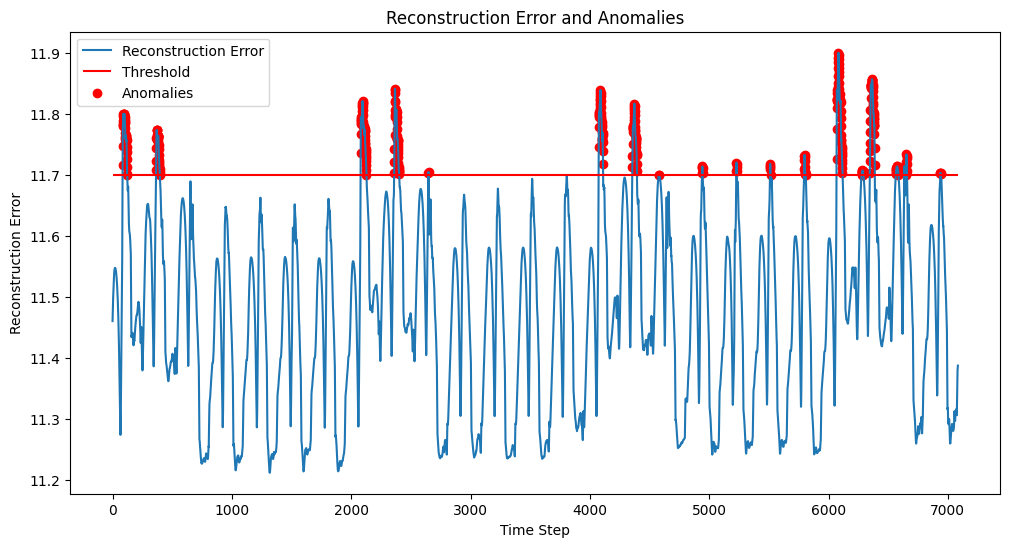

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(test_mse, label='Reconstruction Error')
plt.hlines(threshold, xmin=0, xmax=len(test_mse), colors='r', label='Threshold')
plt.scatter(np.where(anomalies)[0], test_mse[anomalies], color='r', label='Anomalies')
plt.title('Reconstruction Error and Anomalies')
plt.xlabel('Time Step')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()

In [99]:
anomaly_index = np.where(anomalies)[0]
anomalous_rows = df.iloc[train_size + anomaly_index]
print("Anomalous Rows:\n", anomalous_rows)

Anomalous Rows:
                      DOWNLOAD    UPLOAD  YEAR  is_holiday  WEEK_sin  WEEK_cos   
TIME_STAMP                                                                      
2023-11-27 00:05:00  1.738734  1.682745  2023           0 -0.464723  0.885456  \
2023-11-27 00:00:00  1.767241  1.739704  2023           0 -0.464723  0.885456   
2023-11-26 23:55:00  1.847085  1.741985  2023           1 -0.568065  0.822984   
2023-11-26 23:50:00  1.903198  1.834013  2023           1 -0.568065  0.822984   
2023-11-26 23:45:00  1.859951  1.836480  2023           1 -0.568065  0.822984   
...                       ...       ...   ...         ...       ...       ...   
2023-11-03 22:30:00  1.877366  1.898075  2023           0 -0.822984  0.568065   
2023-11-02 22:55:00  1.696345  1.599928  2023           0 -0.822984  0.568065   
2023-11-02 22:50:00  1.693341  1.651550  2023           0 -0.822984  0.568065   
2023-11-02 22:45:00  1.658248  1.717303  2023           0 -0.822984  0.568065   
2023-11-02 

In [100]:
df = df.reset_index()

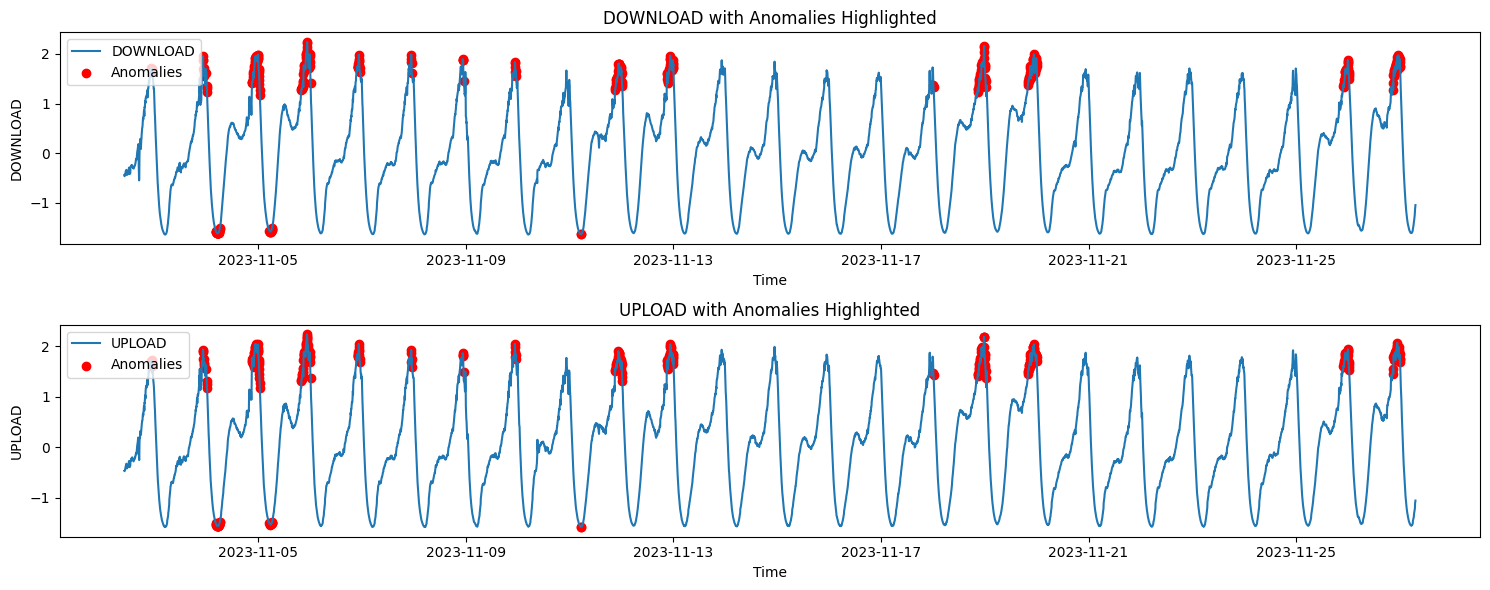

In [102]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 1, 1)
plt.plot(df['TIME_STAMP'][train_size:], df['DOWNLOAD'][train_size:], label='DOWNLOAD')
plt.scatter(df['TIME_STAMP'][train_size:].iloc[anomaly_index], df['DOWNLOAD'][train_size:].iloc[anomaly_index], color='r', label='Anomalies')
plt.title('DOWNLOAD with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('DOWNLOAD')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['TIME_STAMP'][train_size:], df['UPLOAD'][train_size:], label='UPLOAD')
plt.scatter(df['TIME_STAMP'][train_size:].iloc[anomaly_index], df['UPLOAD'][train_size:].iloc[anomaly_index], color='r', label='Anomalies')
plt.title('UPLOAD with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('UPLOAD')
plt.legend()

plt.tight_layout()
plt.show()

# LSTM Test Case Pred

In [78]:
import pickle

with open('LSTM.pkl', 'rb') as file:
    lstm_model = pickle.load(file)

In [159]:
test_row = pd.DataFrame({
    'TIME_STAMP': ['2024-03-05 18:25:00'],
    'SERVER_NAME': ['10.0.901.xx Server 1'],
    'DOWNLOAD': [11927.017],
    'UPLOAD': [424.7]
})

In [160]:
test_row['TIME_STAMP'] = pd.to_datetime(test_row['TIME_STAMP'])

In [161]:
test_row['Time_of_Day'] = test_row['TIME_STAMP'].apply(lambda x: classify_time_of_day(x.hour))

In [162]:
test_row

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,Time_of_Day
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.7,Night


In [163]:
test_row['Time_of_Day_Morning'] = test_row['Time_of_Day'].apply(lambda x: 1 if x == 'Morning' else 0)
test_row['Time_of_Day_Night'] = test_row['Time_of_Day'].apply(lambda x: 1 if x == 'Night' else 0)

In [164]:
test_row['WEEK'] = test_row['TIME_STAMP'].dt.isocalendar().week
test_row['MONTH'] = test_row['TIME_STAMP'].dt.month

In [165]:
test_row['WEEK_sin'] = np.sin(2 * np.pi * test_row['WEEK'] / 52)
test_row['WEEK_cos'] = np.cos(2 * np.pi * test_row['WEEK'] / 52)
test_row['MONTH_sin'] = np.sin(2 * np.pi * test_row['MONTH'] / 12)
test_row['MONTH_cos'] = np.cos(2 * np.pi * test_row['MONTH'] / 12)

In [166]:
test_row['YEAR'] = test_row['TIME_STAMP'].dt.year

In [167]:
test_row = test_row.drop(columns=['WEEK', 'MONTH', 'SERVER_NAME', 'TIME_STAMP'])

In [168]:
test_row[['DOWNLOAD', 'UPLOAD']] = standard_scaler.transform(test_row[['DOWNLOAD', 'UPLOAD']])

In [169]:
test_row

,DOWNLOAD,UPLOAD,Time_of_Day,Time_of_Day_Morning,Time_of_Day_Night,WEEK_sin,WEEK_cos,MONTH_sin,MONTH_cos,YEAR
0,-0.697631,-0.214425,Night,0,1,0.935016,0.354605,1.0,6.123234e-17,2024


In [170]:
columns_sorted = ['DOWNLOAD', 'UPLOAD', 'YEAR', 'is_holiday', 'WEEK_sin', 'WEEK_cos', 'MONTH_sin', 'MONTH_cos', 'Time_of_Day_Morning', 'Time_of_Day_Night']

In [171]:
test_row = test_row.reindex(columns=columns_sorted, fill_value=0)

In [172]:
test_row

,DOWNLOAD,UPLOAD,YEAR,is_holiday,WEEK_sin,WEEK_cos,MONTH_sin,MONTH_cos,Time_of_Day_Morning,Time_of_Day_Night
0,-0.697631,-0.214425,2024,0,0.935016,0.354605,1.0,6.123234e-17,0,1


In [173]:
test_row_arr = test_row.values

In [174]:
test_row_arr

array([[-0.6976313138267842, -0.21442474961813301, 2024, 0,
        0.9350162426854148, 0.35460488704253557, 1.0,
        6.123233995736766e-17, 0, 1]], dtype=object)

In [175]:
sequence_length = X_train.shape[1]

In [176]:
sequence_length

5

In [177]:
test_row_arr = test_row_arr.reshape(1, -1)

In [182]:
last_sequence_part = X_test[-1, 1:, :]

In [184]:
new_sequence = np.append(last_sequence_part, test_row_arr, axis=0).reshape(1, sequence_length, -1)

In [185]:
print("Shape of the new sequence:", new_sequence.shape)

Shape of the new sequence: (1, 5, 10)


In [187]:
new_sequence = np.asarray(new_sequence).astype(np.float32)

In [188]:
n_pred = LSTM.predict(new_sequence)

1/1 [==============================] - 0s 40ms/step


In [190]:
new_mse = np.mean(np.mean(np.abs(n_pred - new_sequence), axis=1), axis=1)

In [191]:
is_anomaly = new_mse > threshold

In [192]:
print("Anomaly Detected:", is_anomaly)

Anomaly Detected: [False]


## Bonus soru 2

In [204]:
df2 = pd.read_excel("data1.xlsx")

In [208]:
df2["DOWNLOAD"].interpolate(method = "linear", inplace = True)

In [209]:
df2["UPLOAD"].interpolate(method = "linear", inplace = True)

In [210]:
df2.isnull().sum()

TIME_STAMP     0
SERVER_NAME    0
DOWNLOAD       0
UPLOAD         0
dtype: int64

In [211]:
def get_3_hour_interval(hour):
    if hour < 3:
        return '00:00 - 03:00'
    elif hour < 6:
        return '03:00 - 06:00'
    elif hour < 9:
        return '06:00 - 09:00'
    elif hour < 12:
        return '09:00 - 12:00'
    elif hour < 15:
        return '12:00 - 15:00'
    elif hour < 18:
        return '15:00 - 18:00'
    elif hour < 21:
        return '18:00 - 21:00'
    else:
        return '21:00 - 24:00';

In [212]:
df2['3_hour_interval'] = df2['TIME_STAMP'].dt.hour.apply(get_3_hour_interval)

In [214]:
df2.dtypes

TIME_STAMP         datetime64[ns]
SERVER_NAME                object
DOWNLOAD                  float64
UPLOAD                    float64
3_hour_interval            object
dtype: object

In [215]:
num_cols = df2[['UPLOAD', 'DOWNLOAD']]

In [216]:
traffic_per_3_hour = df2.groupby('3_hour_interval')[['UPLOAD', 'DOWNLOAD']].sum()

In [217]:
max_upload_3_hour_interval = traffic_per_3_hour['UPLOAD'].idxmax()
max_download_3_hour_interval = traffic_per_3_hour['DOWNLOAD'].idxmax()

In [218]:
max_upload_3_hour_traffic = traffic_per_3_hour['UPLOAD'].max()
max_download_3_hour_traffic = traffic_per_3_hour['DOWNLOAD'].max()

In [219]:
max_upload_3_hour_interval, max_upload_3_hour_traffic, max_download_3_hour_interval, max_download_3_hour_traffic

('21:00 - 24:00', 4082524.373, '21:00 - 24:00', 155980864.74)

## ARIMA

In [132]:
df3 = pd.read_excel("data1.xlsx")

In [133]:
df3["DOWNLOAD"].interpolate(method = "linear", inplace = True)

df3["UPLOAD"].interpolate(method = "linear", inplace = True)

df3.isnull().sum()

TIME_STAMP     0
SERVER_NAME    0
DOWNLOAD       0
UPLOAD         0
dtype: int64

In [134]:
from statsmodels.tsa.stattools import adfuller

In [135]:
a = adfuller(df3["DOWNLOAD"])

In [136]:
print(f" The test statistics of Download: {a[0]}")

 The test statistics of Download: -23.352436327771738


In [137]:
print(f" The p-value of Download: {a[1]}")

 The p-value of Download: 0.0


In [138]:
b = adfuller(df3["UPLOAD"])

In [139]:
print(f" The test statistics of Upload: {b[0]}")

 The test statistics of Upload: -22.414050380127865


In [140]:
print(f" The p-value of Upload: {b[1]}")

 The p-value of Upload: 0.0


### P value < 0.05, so H0 hypotheis is rejected, the dataset is stationary.

In [141]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [142]:
def plot_acf_pacf(timeseries, lags=50, title=''):
    fig, ax = plt.subplots(2, 1, figsize=(14, 10))
    
    plot_acf(timeseries, ax=ax[0], lags=lags)
    ax[0].set_title(f'Autocorrelation Function (ACF) - {title}')
    
    plot_pacf(timeseries, ax=ax[1], lags=lags)
    ax[1].set_title(f'Partial Autocorrelation Function (PACF) - {title}')
    
    plt.tight_layout()
    plt.show()

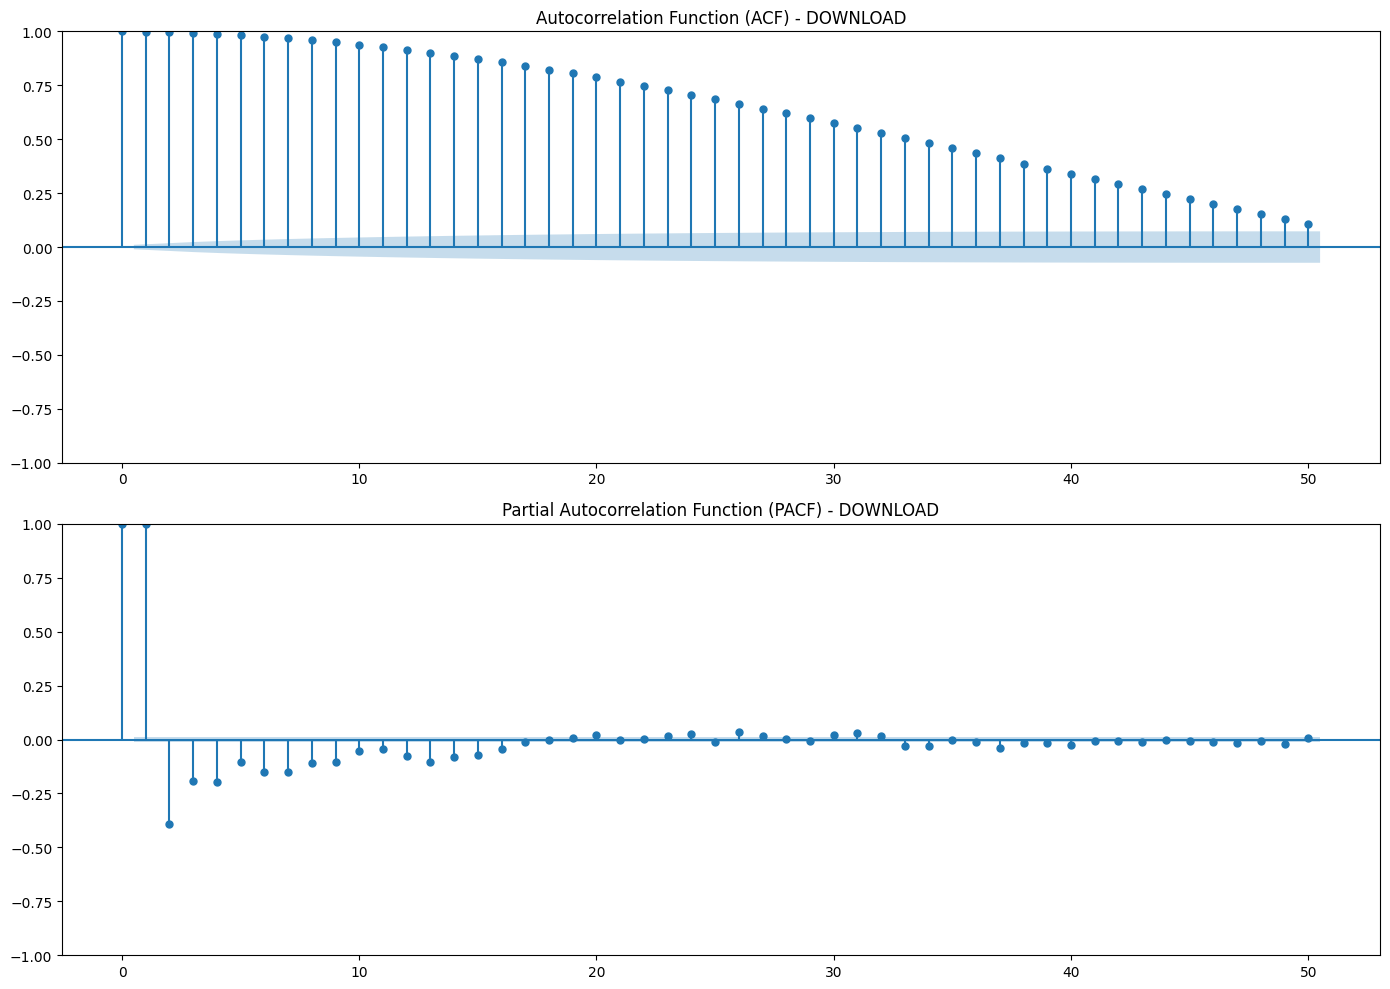

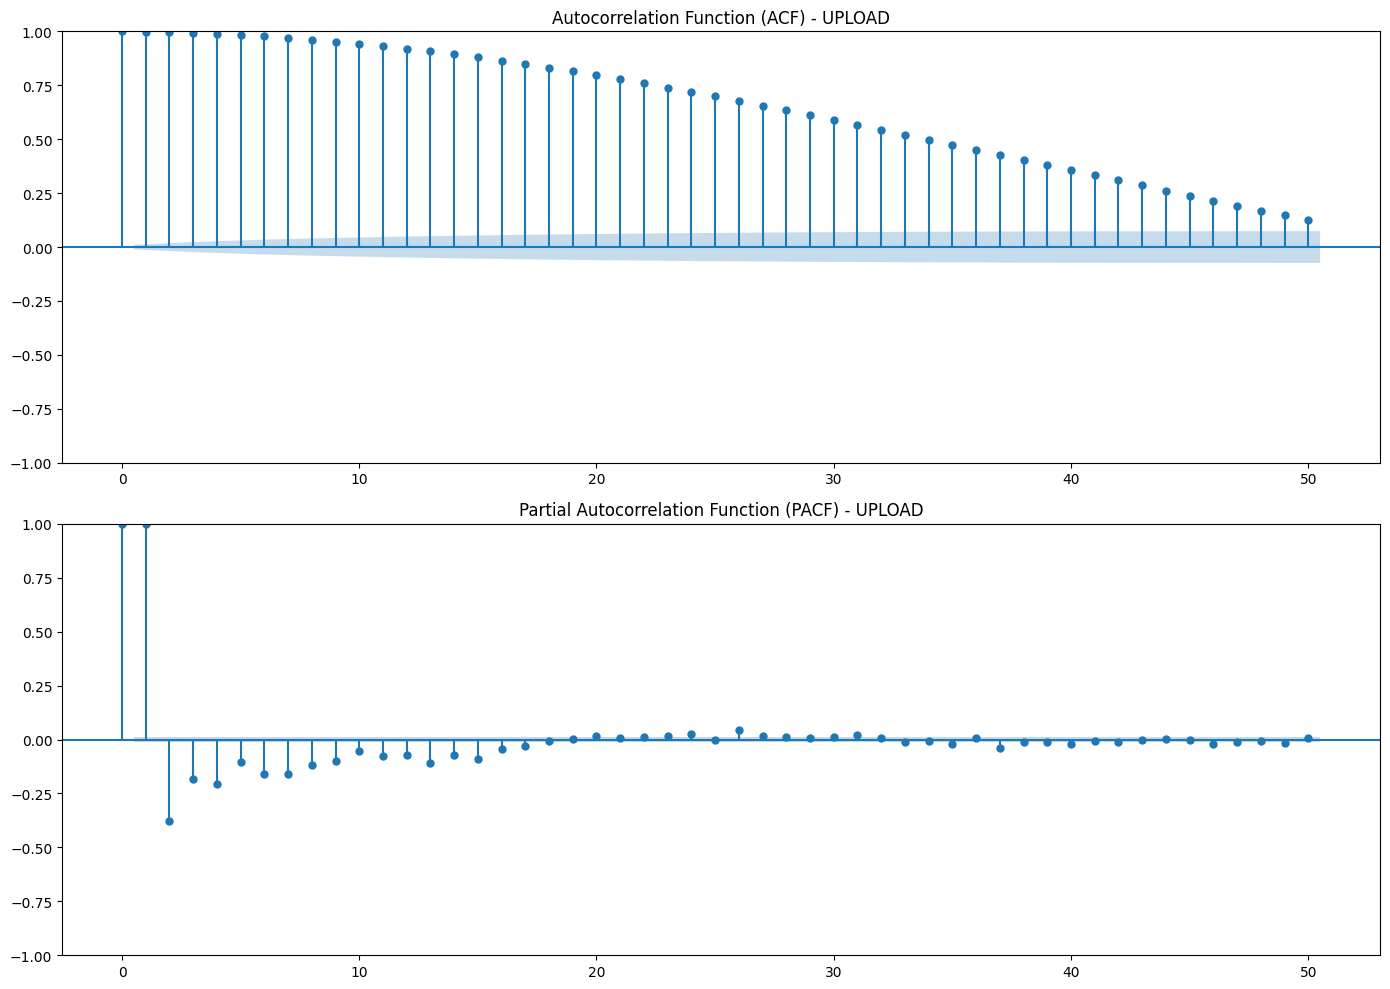

In [143]:
plot_acf_pacf(df3['DOWNLOAD'], title='DOWNLOAD')
plot_acf_pacf(df3['UPLOAD'], title='UPLOAD')

### Stationary -- d = 0, and 1 for p & q.

In [144]:
from statsmodels.tsa.arima.model import ARIMA

In [145]:
download_demo = ARIMA(df3['DOWNLOAD'], order=(1, 0, 1))

In [146]:
download_fit = download_demo.fit()

In [147]:
download_demo_summary = download_fit.summary()
download_demo_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               DOWNLOAD   No. Observations:                35429
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -272663.082
Date:                Thu, 25 Jul 2024   AIC                         545334.165
Time:                        17:07:59   BIC                         545368.066
Sample:                             0   HQIC                        545344.957
                              - 35429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.905e+04   2300.336      8.282      0.000    1.45e+04    2.36e+04
ar.L1          0.9977      0.000   2261.477      0.000       0.997       0.999
ma.L1          0.3092      0.001    573.114      0.000       0.308       0.310
sigma2      2.904e+05    186.555   1556.893      0.000     2.9e+05    2.91e+05
===================================================================================
Ljung-Box (L1) (Q):                 121.29   Jarque-Bera (JB):        1356777549.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            11.44
Prob(H) (two-sided):                  0.00   Kurtosis:                       961.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
upload_demo = ARIMA(df3['UPLOAD'], order=(1, 0, 1))

In [149]:
upload_fit = upload_demo.fit()

In [150]:
upload_model_summary = upload_fit.summary()

In [151]:
upload_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UPLOAD   No. Observations:                35429
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -143068.147
Date:                Thu, 25 Jul 2024   AIC                         286144.294
Time:                        17:08:03   BIC                         286178.196
Sample:                             0   HQIC                        286155.087
                              - 35429                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        482.1503     58.450      8.249      0.000     367.590     596.711
ar.L1          0.9978      0.000   2954.961      0.000       0.997       0.998
ma.L1          0.2991      0.001    543.657      0.000       0.298       0.300
sigma2       188.3448      0.107   1759.038      0.000     188.135     188.555
===================================================================================
Ljung-Box (L1) (Q):                  92.98   Jarque-Bera (JB):         900145163.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             8.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       783.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
timeperiod = pd.to_datetime('2024-03-05 18:25:00')

In [153]:
d_pred = download_fit.get_forecast(steps=1, index=[timeperiod])

In [154]:
u_pred = upload_fit.get_forecast(steps=1, index=[timeperiod])

In [155]:
d_pred_val = d_pred.predicted_mean.iloc[0]
d_conf_int = d_pred.conf_int().iloc[0]

In [156]:
d_pred_val

14707.016452258114

### Real Download Value: 11927,017 --> Anomaly

In [157]:
d_conf_int

lower DOWNLOAD    13650.733305
upper DOWNLOAD    15763.299600
Name: 2024-03-05 18:25:00, dtype: float64

In [158]:
u_pred_val = u_pred.predicted_mean.iloc[0]
u_conf_int = u_pred.conf_int().iloc[0]

In [159]:
u_pred_val

358.273690213166

### Real Upload Value :424,7 --> Anomaly

In [160]:
u_conf_int

lower UPLOAD    331.375388
upper UPLOAD    385.171992
Name: 2024-03-05 18:25:00, dtype: float64

In [161]:
import matplotlib.pyplot as plt

In [163]:
download_predicted = download_fit.predict(start=df3["DOWNLOAD"].index[0], end=df3["DOWNLOAD"].index[-1])

In [164]:
upload_predicted = upload_fit.predict(start=df3["UPLOAD"].index[0], end=df3["UPLOAD"].index[-1])

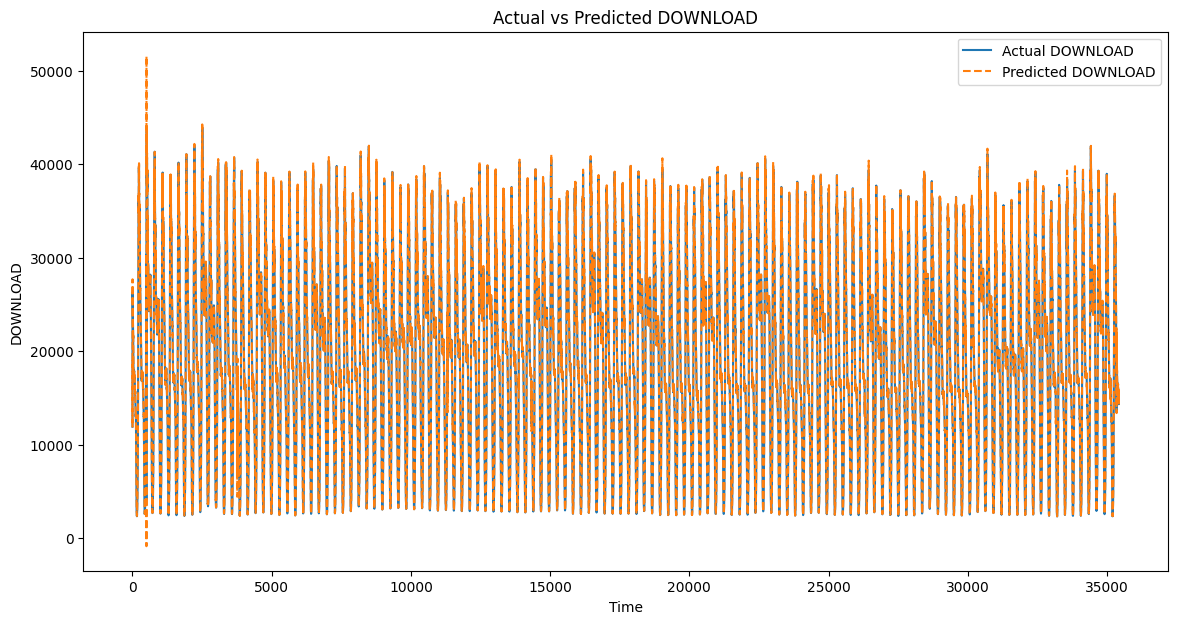

In [165]:
plt.figure(figsize=(14, 7))
plt.plot(df3["DOWNLOAD"], label='Actual DOWNLOAD')
plt.plot(download_predicted, label='Predicted DOWNLOAD', linestyle='--')
plt.title('Actual vs Predicted DOWNLOAD')
plt.xlabel('Time')
plt.ylabel('DOWNLOAD')
plt.legend()
plt.show()

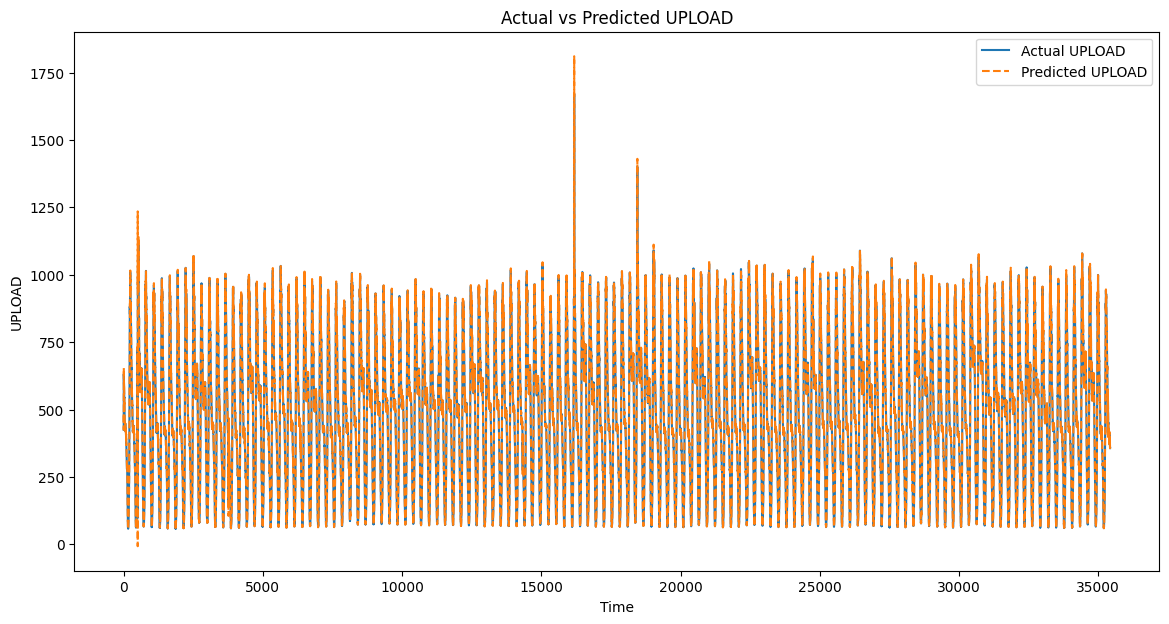

In [166]:
plt.figure(figsize=(14, 7))
plt.plot(df3["UPLOAD"], label='Actual UPLOAD')
plt.plot(upload_predicted, label='Predicted UPLOAD', linestyle='--')
plt.title('Actual vs Predicted UPLOAD')
plt.xlabel('Time')
plt.ylabel('UPLOAD')
plt.legend()
plt.show()